In [122]:
import pandas as pd
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
import datetime
import pymannkendall as mk
from scipy import stats
import statistics
import statsmodels.api as sm

In [123]:
dfo_original=pd.read_excel('/home/insauer/projects/submission_vul_sat/input_data/FloodArchive.xlsx')
dfo=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/DFO_exposure_with_population.csv')

In [124]:
dfo_original

ID GlideNumber      Country OtherCountry       long       lat  \
0        1           0      Algeria            0    5.23026  35.81420   
1        2           0       Brazil            0  -45.34890 -18.71110   
2        3           0  Phillipines            0  122.97400  10.02070   
3        4           0    Indonesia            0  124.60600   1.01489   
4        5           0   Mozambique            0   32.34910 -25.86930   
...    ...         ...          ...          ...        ...       ...   
5125  5127         NaN     Thailand          NaN  101.32300  17.32040   
5126  5128         NaN          USA          NaN  -86.62910  32.49010   
5127  5129         NaN       Mexico          NaN -100.83200  19.95080   
5128  5130         NaN        India          NaN   87.96100  23.79840   
5129  5131         NaN        Italy          NaN    9.37570  44.63930   

           Area      Began      Ended Validation  Dead  Displaced  \
0      92615.67 1985-01-01 1985-01-05       News    26       3000   
1     678498.82 1985-01-15 1985-02-02       News   229      80000   
2      12846.03 1985-01-20 1985-01-21       News    43        444   
3      16542.12 1985-02-04 1985-02-18       News    21        300   
4      20082.21 1985-02-09 1985-02-11       News    19          0   
...         ...        ...        ...        ...   ...        ...   
5125  218554.79 2021-09-23 2021-09-28  FloodList     0      40000   
5126   35416.48 2021-10-06 2021-10-09  FloodList     4          0   
5127   69141.86 2021-10-01 2021-10-09  FloodList     4       2440   
5128   42828.60 2021-10-01 2021-10-09  FloodList    11     500000   
5129   10408.23 2021-10-04 2021-10-06  FloodList     0          0   

                  MainCause  Severity  
0                Heavy rain       1.0  
1                Heavy rain       2.0  
2           Torrential rain       1.0  
3           Torrential rain       1.0  
4                Heavy rain       2.0  
...                     ...       ...  
5125  Tropical Storm Dianmu       1.5  
5126        Torrential Rain       1.5  
5127             Heavy Rain       1.5  
5128         Monsoonal Rain       1.5  
5129        Torrential Rain       1.5  

[5130 rows x 14 columns]

In [125]:
no_impact_ids=list(set(dfo.loc[(dfo['fatalities']==0) & (dfo['displaced']==0), 'DFO_ID']))
no_impact_ids

[2056,
 3607,
 2586,
 2075,
 2588,
 3615,
 2597,
 3622,
 3625,
 2090,
 3629,
 3630,
 3635,
 3640,
 4157,
 4159,
 2115,
 2116,
 3654,
 3655,
 2637,
 2130,
 3668,
 3670,
 4695,
 2136,
 2137,
 3673,
 2143,
 2148,
 4711,
 2154,
 2162,
 2170,
 2172,
 2173,
 2174,
 2175,
 2176,
 2177,
 2179,
 2180,
 2693,
 2182,
 2183,
 4230,
 3722,
 2191,
 2193,
 3734,
 3741,
 2206,
 2208,
 2720,
 3237,
 2220,
 2735,
 3247,
 4275,
 3772,
 2784,
 3297,
 2276,
 4327,
 4328,
 3312,
 3325,
 2303,
 2815,
 2817,
 4358,
 3340,
 3348,
 2330,
 4390,
 4391,
 3370,
 3384,
 2372,
 4434,
 4435,
 1885,
 3425,
 4455,
 4459,
 4464,
 1908,
 3448,
 2424,
 2425,
 3962,
 2428,
 2432,
 2433,
 3457,
 4485,
 3462,
 2440,
 2441,
 2442,
 2443,
 2444,
 2961,
 1943,
 2458,
 2460,
 3494,
 1971,
 1980,
 1985,
 3531,
 4051,
 2007,
 3543,
 3559,
 3567,
 4597,
 2046]

In [126]:
natcat= pd.read_csv('/home/insauer/projects/submission_vul_sat/data_prepared/FLODIS_NatCat_fatalities_damages_filled.csv')
list(set(natcat['DFO_matches_nr']))

['4111',
 '2640',
 '3404',
 '3436',
 '[3713, 3716]',
 '3864',
 '3445',
 '3863',
 '2507',
 '3338',
 '1810',
 '3217',
 '4037',
 '[3723, 3737]',
 '3071',
 '2554',
 '3651',
 '2143',
 '2049',
 '[4171, 4174, 4178]',
 '[4346, 4350]',
 '3553',
 '3960',
 '2867',
 '2076',
 '4227',
 '2648',
 '3218',
 '3271',
 '2433',
 '3394',
 '[2170, 2180]',
 '2516',
 '2785',
 '3123',
 '3113',
 '3971',
 '4055',
 '2437',
 '4364',
 '2627',
 '1997',
 '[2827, 2832, 2839]',
 '1789',
 '3916',
 '4319',
 '2935',
 '4211',
 '2160',
 '3252',
 '4159',
 '2023',
 '2024',
 '4301',
 '2140',
 '2035',
 '3332',
 '3452',
 '2709',
 '2303',
 '2768',
 '[3531, 3534]',
 '3795',
 '3444',
 '2356',
 '3368',
 '3676',
 '4009',
 '4083',
 '3904',
 '2919',
 '3536',
 '4318',
 '3931',
 '3144',
 '3327',
 '3162',
 '3567',
 '3889',
 '1972',
 '2779',
 '3256',
 '2061',
 '3073',
 '4288',
 '2632',
 '4241',
 '3551',
 '4022',
 '2426',
 '[2152, 2154]',
 '2649',
 '3205',
 '4013',
 '3094',
 '3871',
 '3678',
 '2821',
 '4019',
 '3602',
 '[1977, 1996]',
 '3198'

In [127]:
len(list(set(natcat['DFO_matches_nr']) & set(dfo.loc[(dfo['fatalities']==0) & (dfo['displaced']==0), 'DFO_ID'].astype(str))))

44

In [184]:
dfo_0=list(set(dfo.loc[(dfo['fatalities']==0), 'DFO_ID'].astype(str)))

In [188]:
natcat_0=list(set(natcat.loc[(natcat['Fatalities']==0), 'DFO_matches_nr'].astype(str)))

In [189]:
dfo.loc[dfo['DFO_ID'].astype(str).isin(natcat_0)&~(dfo['fatalities']==0)]

DFO_ID  year_x  DFO_satellite_shape_area_x  affected_sum_GHSL_x  \
4      1627    2000                  4993.51005            7654156.0   
7      1725    2001                120508.29836            1151978.0   
13     1791    2001                  4929.61479            3055200.0   
16     1818    2001                  5804.02495             532825.0   
19     1840    2001                  7961.12984             161675.0   
..      ...     ...                         ...                  ...   
819    4315    2015                 47668.24369             854940.0   
820    4317    2015                  1681.75330            1560038.0   
818    4314    2016                 57215.73959            3106738.0   
826    4326    2016                  7253.52365             316575.0   
837    4355    2016                  9211.88301            5117247.0   

     affected_mean_GHSL_x  DFO_satellite_shape_pop_density_GHSL_x  \
4                   279.0                                0.055873   
7                     2.0                                0.000017   
13                  211.0                                0.042803   
16                   23.0                                0.003963   
19                    6.0                                0.000754   
..                    ...                                     ...   
819                   7.0                                0.000147   
820                 210.0                                0.124870   
818                  14.0                                0.000245   
826                  12.0                                0.001654   
837                 220.0                                0.023882   

     affected_sum_GPW_x  affected_mean_GPW_x  \
4             4387298.0                160.0   
7             1056580.0                  2.0   
13            6765802.0                467.0   
16             345064.0                 15.0   
19             161029.0                  6.0   
..                  ...                  ...   
819           1465662.0                 12.0   
820           1289995.0                174.0   
818           3152037.0                 15.0   
826            299457.0                 11.0   
837           8250209.0                354.0   

     DFO_satellite_shape_pop_density_GPW_x  year_y  ...  days     day_plot  \
4                               878.600014    2000  ...   242  2000.663014   
7                                 8.767695    2001  ...   497  2001.361644   
13                             1372.480871    2001  ...   615  2001.684932   
16                               59.452536    2001  ...   664  2001.819178   
19                               20.226903    2001  ...   716  2001.961644   
..                                     ...     ...  ...   ...          ...   
819                              30.747137    2015  ...  5813  2015.926027   
820                             767.053646    2015  ...  5813  2015.926027   
818                              55.090383    2016  ...  5827  2015.964384   
826                              41.284349    2016  ...  5862  2016.060274   
837                             895.605056    2016  ...  5954  2016.312329   

      vul_fat  log_vul_fat  vul_fat_alt  log_vul_fat_alt  development  \
4    0.000007    -5.150835     0.000007        -5.137047       medium   
7    0.000007    -5.178804     0.000008        -5.120812         high   
13   0.000022    -4.665966     0.000022        -4.663002          low   
16   0.000055    -4.259146     0.000058        -4.236870       medium   
19   0.000019    -4.729783     0.000025        -4.604844         high   
..        ...          ...          ...              ...          ...   
819  0.000008    -5.086853     0.000009        -5.052090         high   
820  0.000087    -4.061370     0.000088        -4.057510          low   
818  0.000010    -5.007230     0.000010        -4.993441    very high   
826  0.000023    -4.631236     0.000027        -4.573244         hi

In [186]:
natcat.loc[natcat['DFO_matches_nr'].isin(dfo_0)&~(natcat['Fatalities']==0)]

Unnamed: 0    year  ISO  tot_loss  ins_loss  tot_loss_GDP  tot_loss_GCP  \
23           26  2002.0  ETH      1.00       0.0      8.379214      6.397774   
30           34  2002.0  CHN   3100.00       0.0  21732.824628  19443.341927   
64           71  2002.0  ITA      0.01       0.0      0.014359      0.013499   
66           73  2002.0  IDN      2.00       0.0      8.972190     10.392299   
70           77  2003.0  GBR    150.00     100.0    193.465323    197.549738   
..          ...     ...  ...       ...       ...           ...           ...   
759         827  2013.0  PHL      6.05       0.0      6.745146      7.227984   
760         828  2013.0  PRY      3.00       0.0      2.889634      3.419626   
763         831  2013.0  SSD      0.15       0.0      0.109527      0.126150   
766         834  2014.0  IND      1.50       0.0      1.721744      1.669524   
786         854  2016.0  AUS     21.00       7.0     21.000000     21.000000   

     tot_loss_CPI  Fatalities     CPI_conv  ...  days         income_group  \
23       2.669226        22.0     2.015128  ...   835           Low income   
30    5595.258182       500.0  5169.325385  ...   885  Upper middle income   
64       0.014869         1.0     0.017795  ...  1049          High income   
66       3.571996        39.0     4.071830  ...  1053  Lower middle income   
70     166.225911         1.0   181.932696  ...  1096          High income   
..            ...         ...          ...  ...   ...                  ...   
759      5.881767        19.0          NaN  ...  4761  Lower middle income   
760      2.562300         5.0          NaN  ...  4934  Upper middle income   
763      0.177309        54.0          NaN  ...  5041           Low income   
766      1.532551        27.0          NaN  ...  5294  Lower middle income   
786     21.000000         1.0          NaN  ...  5854          High income   

     regions                     region  development     vul_asset  \
23       NaN         Sub-Saharan Africa          low  1.393825e-02   
30       NaN        East Asia & Pacific       medium  3.801403e-03   
64       NaN      Europe & Central Asia    very high  6.545330e-09   
66       NaN        East Asia & Pacific       medium  1.757878e-05   
70       NaN      Europe & Central Asia    very high  3.352483e-05   
..       ...                        ...          ...           ...   
759      NaN        East Asia & Pacific       medium  8.693620e-06   
760      NaN  Latin America & Caribbean         high  2.607901e-05   
763      NaN         Sub-Saharan Africa          low           NaN   
766      NaN                 South Asia       medium  1.753430e-04   
786      NaN        East Asia & Pacific    very high  4.139541e-05   

     log_vul_asset       vul_fat  log_vul_fat  modeled_fld_exp  
23       -1.855792  3.806887e-03    -2.419430             11.2  
30       -2.420056  2.761036e-05    -4.558928             27.5  
64       -8.184068  5.670120e-07    -6.246408             13.8  
66       -4.755011  6.079994e-05    -4.216097             27.0  
70       -4.474633  6.874015e-08    -7.162790             11.0  
..             ...           ...          ...              ...  
759      -5.060799  7.364250e-06    -5.132871             29.0  
760      -4.583709  1.612227e-05    -4.792574             13.1  
763            NaN  5.017841e-04    -3.299483             32.5  
766      -3.756112  2.260114e-04    -3.645870             27.7  
786      -4.383048  5.861355e-06    -5.232002              7.9  

[73 rows x 93 columns]

In [129]:
913/3132

0.29150702426564495

In [130]:
def year(x):
    return int(x.split('-')[0])
    
dfo_original['year']=dfo_original['Began'].astype(str).apply(year)
dfo_original

ID GlideNumber      Country OtherCountry       long       lat  \
0        1           0      Algeria            0    5.23026  35.81420   
1        2           0       Brazil            0  -45.34890 -18.71110   
2        3           0  Phillipines            0  122.97400  10.02070   
3        4           0    Indonesia            0  124.60600   1.01489   
4        5           0   Mozambique            0   32.34910 -25.86930   
...    ...         ...          ...          ...        ...       ...   
5125  5127         NaN     Thailand          NaN  101.32300  17.32040   
5126  5128         NaN          USA          NaN  -86.62910  32.49010   
5127  5129         NaN       Mexico          NaN -100.83200  19.95080   
5128  5130         NaN        India          NaN   87.96100  23.79840   
5129  5131         NaN        Italy          NaN    9.37570  44.63930   

           Area      Began      Ended Validation  Dead  Displaced  \
0      92615.67 1985-01-01 1985-01-05       News    26       3000   
1     678498.82 1985-01-15 1985-02-02       News   229      80000   
2      12846.03 1985-01-20 1985-01-21       News    43        444   
3      16542.12 1985-02-04 1985-02-18       News    21        300   
4      20082.21 1985-02-09 1985-02-11       News    19          0   
...         ...        ...        ...        ...   ...        ...   
5125  218554.79 2021-09-23 2021-09-28  FloodList     0      40000   
5126   35416.48 2021-10-06 2021-10-09  FloodList     4          0   
5127   69141.86 2021-10-01 2021-10-09  FloodList     4       2440   
5128   42828.60 2021-10-01 2021-10-09  FloodList    11     500000   
5129   10408.23 2021-10-04 2021-10-06  FloodList     0          0   

                  MainCause  Severity  year  
0                Heavy rain       1.0  1985  
1                Heavy rain       2.0  1985  
2           Torrential rain       1.0  1985  
3           Torrential rain       1.0  1985  
4                Heavy rain       2.0  1985  
...                     ...       ...   ...  
5125  Tropical Storm Dianmu       1.5  2021  
5126        Torrential Rain       1.5  2021  
5127             Heavy Rain       1.5  2021  
5128         Monsoonal Rain       1.5  2021  
5129        Torrential Rain       1.5  2021  

[5130 rows x 15 columns]

In [131]:
dfo_original.loc[(dfo_original['year']>=2000)&(dfo_original['year']<=2018)]

ID GlideNumber       Country OtherCountry      long       lat  \
1580  1581           0      Brazil              0  -49.3032 -24.89040   
1581  1582           0        Angola            0   13.2462 -14.14520   
1582  1583           0    Mozambique            0   31.7120 -27.82190   
1583  1584           0  Philippines             0  126.1000   7.19937   
1584  1585           0           USA            0  -83.5500  37.72270   
...    ...         ...           ...          ...       ...       ...   
4707  4710         NaN        Cyprus       Israel   35.2079  32.71340   
4708  4711         NaN           USA          NaN -120.0580  35.77870   
4710  4713         NaN   Philippines          NaN  124.9900  11.79220   
4711  4714         NaN     Sri Lanka          NaN   80.8597   7.71145   
4712  4715         NaN     Indonesia          NaN  105.7040  -4.95813   

           Area      Began      Ended Validation  Dead  Displaced  \
1580  351934.80 2000-01-01 2000-01-10       News    40     100000   
1581   47260.45 2000-01-08 2000-01-15       News    31      70000   
1582  439042.75 2000-01-26 2000-03-27       News   929     733000   
1583   16784.23 2000-01-28 2000-02-01       News    23      20000   
1584   55642.90 2000-02-18 2000-02-22       News     8         40   
...         ...        ...        ...        ...   ...        ...   
4707   14894.88 2018-12-05 2018-12-10  FloodList     4          0   
4708   72393.23 2018-12-05 2018-12-10  FloodList     0          0   
4710   45871.98 2018-12-29 2019-01-07  FloodList   100      80000   
4711   49073.87 2018-12-22 2018-12-26  FloodList     2      11000   
4712   12324.38 2018-12-22 2018-12-23  FloodList   373       1600   

                  MainCause  Severity  year  
1580             Heavy rain       1.0  2000  
1581             Heavy rain       1.0  2000  
1582             Heavy rain       2.0  2000  
1583  Brief torrential rain       1.0  2000  
1584             Heavy rain       1.0  2000  
...                     ...       ...   ...  
4707             Heavy Rain       1.5  2018  
4708             Heavy Rain       1.5  2018  
4710  Tropical Storm  Usman       1.5  2018  
4711             Heavy Rain       1.5  2018  
4712                Tsunami       2.0  2018  

[3132 rows x 15 columns]

## 1.1 Extract exact dates

In [132]:
dfo_ids= list(set(dfo['DFO_ID']))

In [133]:
len(dfo_ids)

913

In [134]:
dfo_original=dfo_original.loc[dfo_original['ID'].isin(dfo_ids)]
dfo_original

ID GlideNumber     Country OtherCountry       long       lat  \
1585  1586           0  Australia             0  143.69800 -31.26810   
1586  1587           0  Madagascar            0   47.29570 -15.78260   
1594  1595           0     Romania      Hungary   22.41540  46.76370   
1613  1614           0    Thailand      Vietnam  105.06400  11.24260   
1625  1627           0       China       Russia  132.05800  43.77390   
...    ...         ...         ...          ...        ...       ...   
4680  4683         NaN       Ghana          NaN   -1.06606   9.53755   
4692  4695         NaN      Mexico          NaN -105.23600  23.72180   
4700  4703         NaN    Paraguay          NaN  -57.08530 -25.34270   
4701  4704         NaN     Vietnam          NaN  107.13700  11.49100   
4708  4711         NaN         USA          NaN -120.05800  35.77870   

           Area      Began      Ended    Validation  Dead  Displaced  \
1585  468962.97 2000-02-18 2000-03-01          News     1        200   
1586  255303.35 2000-02-17 2000-03-11          News   200     800000   
1594  116230.15 2000-04-05 2000-04-25          News    10        623   
1613  119919.56 2000-07-11 2000-08-10          News    33      25000   
1625   81863.87 2000-08-30 2000-09-10          News    31      14140   
...         ...        ...        ...           ...   ...        ...   
4680   83997.78 2018-09-01 2018-10-02     FloodList    34     100000   
4692  284823.97 2018-10-23 2018-10-27  News Reports     0          0   
4700   97154.20 2018-10-29 2018-11-07     FloodList     0      10000   
4701  121111.99 2018-11-24 2018-11-29     FloodList     1     100000   
4708   72393.23 2018-12-05 2018-12-10     FloodList     0          0   

                     MainCause  Severity  year  
1585            Monsoonal rain       2.0  2000  
1586          Tropical cyclone       1.0  2000  
1594                  Snowmelt       2.0  2000  
1613            Monsoonal rain       1.0  2000  
1625          Tropical cyclone       1.0  2000  
...                        ...       ...   ...  
4680  Heavy Rain, Dam releases       1.5  2018  
4692      Tropical Storm Willa       1.5  2018  
4700                Heavy Rain       1.0  2018  
4701      Tropical Storm Usagi       1.0  2018  
4708                Heavy Rain       1.5  2018  

[913 rows x 15 columns]

In [135]:
dfo_original_dates=dfo_original[['ID','Began']]
dfo_original_dates

ID      Began
1585  1586 2000-02-18
1586  1587 2000-02-17
1594  1595 2000-04-05
1613  1614 2000-07-11
1625  1627 2000-08-30
...    ...        ...
4680  4683 2018-09-01
4692  4695 2018-10-23
4700  4703 2018-10-29
4701  4704 2018-11-24
4708  4711 2018-12-05

[913 rows x 2 columns]

In [136]:
dfo=pd.merge(dfo, dfo_original_dates, right_on='ID',left_on='DFO_ID')
dfo

Unnamed: 0  DFO_ID  year_x  DFO_satellite_shape_area_x  \
0             0    1586    2000                   347.68820   
1             1    1587    2000                   674.30875   
2             2    1595    2000                   381.13460   
3             3    1614    2000                  5277.23812   
4             4    1627    2000                  4993.51005   
..          ...     ...     ...                         ...   
908         908    4683    2018                  3695.39845   
909         909    4695    2018                  6236.51346   
910         910    4703    2018                 15398.85421   
911         911    4704    2018                 10842.06088   
912         912    4711    2018                  5724.18658   

     affected_sum_GHSL_x  affected_mean_GHSL_x  \
0                 1765.0                   1.0   
1               260591.0                  46.0   
2               154707.0                  35.0   
3              4521984.0                 174.0   
4              7654156.0                 279.0   
..                   ...                   ...   
908             200464.0                  26.0   
909             464147.0                  21.0   
910             312650.0                   7.0   
911            3725788.0                 138.0   
912             942633.0                  33.0   

     DFO_satellite_shape_pop_density_GHSL_x  affected_sum_GPW_x  \
0                                  0.002876              1426.0   
1                                  0.068218             44132.0   
2                                  0.091831            144516.0   
3                                  0.032972           5236497.0   
4                                  0.055873           4387298.0   
..                                      ...                 ...   
908                                0.007036            189727.0   
909                                0.003367            455083.0   
910                                0.000455            501678.0   
911                                0.012728           4011774.0   
912                                0.005765            918085.0   

     affected_mean_GPW_x  DFO_satellite_shape_pop_density_GPW_x  ...  \
0                    1.0                               4.101376  ...   
1                    8.0                              65.447764  ...   
2                   33.0                             379.173132  ...   
3                  201.0                             992.279841  ...   
4                  160.0                             878.600014  ...   
..                   ...                                    ...  ...   
908                 25.0                              51.341419  ...   
909                 21.0                              72.970740  ...   
910                 11.0                              32.578917  ...   
911                148.0                             370.019505  ...   
912                 32.0                             160.386980  ...   

     female_mean  pop_0_14_mean  pop_65_plus_mean  FLOPROS_merged_mean  \
0        0.42882        0.19052           0.10329            100.00000   
1        0.56861        0.50981           0.15863              1.38693   
2        0.50374        0.16802           0.13982            142.68362   
3           -inf           -inf              -inf              7.60928   
4        0.57745        0.27385           0.24629             25.43604   
..           ...            ...               ...                  ...   
908      0.50033        0.44313           0.04575              5.01163   
909      0.51174        0.32421           0.17589             87.28910   
910      0.45924        0.29388           0.06352             11.33480   
911      0.52225        0.34203           0.08449              4.91574   
912         -inf           -inf              -inf            304.43938   

     FLOPROS_modeled_mean  forest_cover_mean  fatalities  displaced    ID  \
0          

In [137]:
dfo_original_dates=dfo_original[['ID','Began']]
dfo_original_dates

ID      Began
1585  1586 2000-02-18
1586  1587 2000-02-17
1594  1595 2000-04-05
1613  1614 2000-07-11
1625  1627 2000-08-30
...    ...        ...
4680  4683 2018-09-01
4692  4695 2018-10-23
4700  4703 2018-10-29
4701  4704 2018-11-24
4708  4711 2018-12-05

[913 rows x 2 columns]

In [138]:
dfo.columns

Index(['Unnamed: 0', 'DFO_ID', 'year_x', 'DFO_satellite_shape_area_x',
       'affected_sum_GHSL_x', 'affected_mean_GHSL_x',
       'DFO_satellite_shape_pop_density_GHSL_x', 'affected_sum_GPW_x',
       'affected_mean_GPW_x', 'DFO_satellite_shape_pop_density_GPW_x',
       'year_y', 'DFO_satellite_shape_area_y', 'affected_sum_GHSL_y',
       'affected_mean_GHSL_y', 'DFO_satellite_shape_pop_density_GHSL_y',
       'affected_sum_GPW_y', 'affected_mean_GPW_y',
       'DFO_satellite_shape_pop_density_GPW_y', 'GDP_affected_sum',
       'cable_affected_sum', 'plant_affected_sum', 'power_pole_affected_sum',
       'power_tower_affected_sum', 'line_affected_sum', 'mast_affected_sum',
       'communication_tower_affected_sum', 'doctors_affected_sum',
       'hospital_affected_sum', 'pharmacy_affected_sum',
       'primary_road_affected_sum', 'tertiary_road_affected_sum',
       'reservoir_affected_sum', 'school_affected_sum',
       'university_affected_sum', 'GDP_affected_mean',
       'educat

In [139]:
dfo = dfo.drop(columns=['Unnamed: 0'])
dfo

DFO_ID  year_x  DFO_satellite_shape_area_x  affected_sum_GHSL_x  \
0      1586    2000                   347.68820               1765.0   
1      1587    2000                   674.30875             260591.0   
2      1595    2000                   381.13460             154707.0   
3      1614    2000                  5277.23812            4521984.0   
4      1627    2000                  4993.51005            7654156.0   
..      ...     ...                         ...                  ...   
908    4683    2018                  3695.39845             200464.0   
909    4695    2018                  6236.51346             464147.0   
910    4703    2018                 15398.85421             312650.0   
911    4704    2018                 10842.06088            3725788.0   
912    4711    2018                  5724.18658             942633.0   

     affected_mean_GHSL_x  DFO_satellite_shape_pop_density_GHSL_x  \
0                     1.0                                0.002876   
1                    46.0                                0.068218   
2                    35.0                                0.091831   
3                   174.0                                0.032972   
4                   279.0                                0.055873   
..                    ...                                     ...   
908                  26.0                                0.007036   
909                  21.0                                0.003367   
910                   7.0                                0.000455   
911                 138.0                                0.012728   
912                  33.0                                0.005765   

     affected_sum_GPW_x  affected_mean_GPW_x  \
0                1426.0                  1.0   
1               44132.0                  8.0   
2              144516.0                 33.0   
3             5236497.0                201.0   
4             4387298.0                160.0   
..                  ...                  ...   
908            189727.0                 25.0   
909            455083.0                 21.0   
910            501678.0                 11.0   
911           4011774.0                148.0   
912            918085.0                 32.0   

     DFO_satellite_shape_pop_density_GPW_x  year_y  ...  female_mean  \
0                                 4.101376    2000  ...      0.42882   
1                                65.447764    2000  ...      0.56861   
2                               379.173132    2000  ...      0.50374   
3                               992.279841    2000  ...         -inf   
4                               878.600014    2000  ...      0.57745   
..                                     ...     ...  ...          ...   
908                              51.341419    2018  ...      0.50033   
909                              72.970740    2018  ...      0.51174   
910                              32.578917    2018  ...      0.45924   
911                             370.019505    2018  ...      0.52225   
912                             160.386980    2018  ...         -inf   

     pop_0_14_mean  pop_65_plus_mean  FLOPROS_merged_mean  \
0          0.19052           0.10329            100.00000   
1          0.50981           0.15863              1.38693   
2          0.16802           0.13982            142.68362   
3             -inf              -inf              7.60928   
4          0.27385           0.24629             25.43604   
..             ...               ...                  ...   
908        0.44313           0.04575              5.01163   
909        0.32421           0.17589             87.28910   
910        0.29388           0.06352             11.33480   
911        0.34203           0.08449              4.91574   
912           -inf              -inf            304.43938   

     FLOPROS_modeled_mean  forest_cover_mean  fatalities  displaced    ID  \
0                48.41190                0.0           1   

In [140]:
d0 = datetime.date(2000, 1, 1)

def coverts_2days(x):
    d1= x.date()
    delta= d1-d0
    return delta.days

In [141]:
dfo.columns

Index(['DFO_ID', 'year_x', 'DFO_satellite_shape_area_x', 'affected_sum_GHSL_x',
       'affected_mean_GHSL_x', 'DFO_satellite_shape_pop_density_GHSL_x',
       'affected_sum_GPW_x', 'affected_mean_GPW_x',
       'DFO_satellite_shape_pop_density_GPW_x', 'year_y',
       'DFO_satellite_shape_area_y', 'affected_sum_GHSL_y',
       'affected_mean_GHSL_y', 'DFO_satellite_shape_pop_density_GHSL_y',
       'affected_sum_GPW_y', 'affected_mean_GPW_y',
       'DFO_satellite_shape_pop_density_GPW_y', 'GDP_affected_sum',
       'cable_affected_sum', 'plant_affected_sum', 'power_pole_affected_sum',
       'power_tower_affected_sum', 'line_affected_sum', 'mast_affected_sum',
       'communication_tower_affected_sum', 'doctors_affected_sum',
       'hospital_affected_sum', 'pharmacy_affected_sum',
       'primary_road_affected_sum', 'tertiary_road_affected_sum',
       'reservoir_affected_sum', 'school_affected_sum',
       'university_affected_sum', 'GDP_affected_mean',
       'education_affected_m

In [142]:
dfo['days']= dfo['Began'].apply(coverts_2days)
dfo

DFO_ID  year_x  DFO_satellite_shape_area_x  affected_sum_GHSL_x  \
0      1586    2000                   347.68820               1765.0   
1      1587    2000                   674.30875             260591.0   
2      1595    2000                   381.13460             154707.0   
3      1614    2000                  5277.23812            4521984.0   
4      1627    2000                  4993.51005            7654156.0   
..      ...     ...                         ...                  ...   
908    4683    2018                  3695.39845             200464.0   
909    4695    2018                  6236.51346             464147.0   
910    4703    2018                 15398.85421             312650.0   
911    4704    2018                 10842.06088            3725788.0   
912    4711    2018                  5724.18658             942633.0   

     affected_mean_GHSL_x  DFO_satellite_shape_pop_density_GHSL_x  \
0                     1.0                                0.002876   
1                    46.0                                0.068218   
2                    35.0                                0.091831   
3                   174.0                                0.032972   
4                   279.0                                0.055873   
..                    ...                                     ...   
908                  26.0                                0.007036   
909                  21.0                                0.003367   
910                   7.0                                0.000455   
911                 138.0                                0.012728   
912                  33.0                                0.005765   

     affected_sum_GPW_x  affected_mean_GPW_x  \
0                1426.0                  1.0   
1               44132.0                  8.0   
2              144516.0                 33.0   
3             5236497.0                201.0   
4             4387298.0                160.0   
..                  ...                  ...   
908            189727.0                 25.0   
909            455083.0                 21.0   
910            501678.0                 11.0   
911           4011774.0                148.0   
912            918085.0                 32.0   

     DFO_satellite_shape_pop_density_GPW_x  year_y  ...  pop_0_14_mean  \
0                                 4.101376    2000  ...        0.19052   
1                                65.447764    2000  ...        0.50981   
2                               379.173132    2000  ...        0.16802   
3                               992.279841    2000  ...           -inf   
4                               878.600014    2000  ...        0.27385   
..                                     ...     ...  ...            ...   
908                              51.341419    2018  ...        0.44313   
909                              72.970740    2018  ...        0.32421   
910                              32.578917    2018  ...        0.29388   
911                             370.019505    2018  ...        0.34203   
912                             160.386980    2018  ...           -inf   

     pop_65_plus_mean  FLOPROS_merged_mean  FLOPROS_modeled_mean  \
0             0.10329            100.00000              48.41190   
1             0.15863              1.38693               1.38693   
2             0.13982            142.68362              38.82062   
3                -inf              7.60928               7.36170   
4             0.24629             25.43604              24.85107   
..                ...                  ...                   ...   
908           0.04575              5.01163               5.01163   
909           0.17589             87.28910              23.31754   
910           0.06352             11.33480              11.33480   
911           0.08449              4.91574               4.73173   
912              -inf            304.43938              78.13668   

     forest_cover_mean  fata

In [143]:
dfo['day_plot']=(dfo['days']/365)+2000
dfo

DFO_ID  year_x  DFO_satellite_shape_area_x  affected_sum_GHSL_x  \
0      1586    2000                   347.68820               1765.0   
1      1587    2000                   674.30875             260591.0   
2      1595    2000                   381.13460             154707.0   
3      1614    2000                  5277.23812            4521984.0   
4      1627    2000                  4993.51005            7654156.0   
..      ...     ...                         ...                  ...   
908    4683    2018                  3695.39845             200464.0   
909    4695    2018                  6236.51346             464147.0   
910    4703    2018                 15398.85421             312650.0   
911    4704    2018                 10842.06088            3725788.0   
912    4711    2018                  5724.18658             942633.0   

     affected_mean_GHSL_x  DFO_satellite_shape_pop_density_GHSL_x  \
0                     1.0                                0.002876   
1                    46.0                                0.068218   
2                    35.0                                0.091831   
3                   174.0                                0.032972   
4                   279.0                                0.055873   
..                    ...                                     ...   
908                  26.0                                0.007036   
909                  21.0                                0.003367   
910                   7.0                                0.000455   
911                 138.0                                0.012728   
912                  33.0                                0.005765   

     affected_sum_GPW_x  affected_mean_GPW_x  \
0                1426.0                  1.0   
1               44132.0                  8.0   
2              144516.0                 33.0   
3             5236497.0                201.0   
4             4387298.0                160.0   
..                  ...                  ...   
908            189727.0                 25.0   
909            455083.0                 21.0   
910            501678.0                 11.0   
911           4011774.0                148.0   
912            918085.0                 32.0   

     DFO_satellite_shape_pop_density_GPW_x  year_y  ...  pop_65_plus_mean  \
0                                 4.101376    2000  ...           0.10329   
1                                65.447764    2000  ...           0.15863   
2                               379.173132    2000  ...           0.13982   
3                               992.279841    2000  ...              -inf   
4                               878.600014    2000  ...           0.24629   
..                                     ...     ...  ...               ...   
908                              51.341419    2018  ...           0.04575   
909                              72.970740    2018  ...           0.17589   
910                              32.578917    2018  ...           0.06352   
911                             370.019505    2018  ...           0.08449   
912                             160.386980    2018  ...              -inf   

     FLOPROS_merged_mean  FLOPROS_modeled_mean  forest_cover_mean  fatalities  \
0              100.00000              48.41190                0.0           1   
1                1.38693               1.38693                0.0         200   
2              142.68362              38.82062                0.0          10   
3                7.60928               7.36170                0.0          33   
4               25.43604              24.85107                0.0          31   
..                   ...                   ...                ...         ...   
908              5.01163               5.01163                0.0          34   
909             87.28910              23.31754                0.0           0   
910             11.33480              11.33480                0.0           0   

In [144]:
# calculate vulnerabilities
dfo['vul_fat']=dfo['fatalities']/dfo['affected_sum_GPW_x']
dfo['vul_fat']=dfo['vul_fat'].replace([np.inf,-np.inf],[np.nan,np.nan])
dfo['log_vul_fat']=np.log10(dfo['vul_fat']).replace([np.inf,-np.inf],[np.nan,np.nan])

/home/insauer/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [145]:
# calculate vulnerabilities
dfo['vul_fat_alt']=(dfo['fatalities']+1)/dfo['affected_sum_GPW_x']
dfo['vul_fat_alt']=dfo['vul_fat_alt'].replace([np.inf,-np.inf],[np.nan,np.nan])
dfo['log_vul_fat_alt']=np.log10(dfo['vul_fat_alt']).replace([np.inf,-np.inf],[np.nan,np.nan])

In [146]:
# summarize yearly data
dfo_yearly_medians=dfo.groupby('year_x').median()
dfo_yearly_medians['log_vul_fat']=np.log10(dfo_yearly_medians['vul_fat']).replace([-np.inf,np.inf],[np.nan,np.nan])
dfo_yearly_means=dfo.groupby('year_x').mean()
dfo_yearly_means['log_vul_fat']=np.log10(dfo_yearly_means['vul_fat']).replace([-np.inf,np.inf],[np.nan,np.nan])

In [147]:
dfo=dfo.sort_values(by='day_plot')

# Temporal trends

In [148]:
cm = 1/2.54
x_width= 11.0*cm
y_width= 6.0*cm
y_width

2.3622047244094486

Slope_OLS= -0.013620995981712666
P_OLS= 0.10563977093978959
Slope_MK= 0.0
P_MK= 0.543607888331227
Slope_OLS annual mean= -0.057100166346803004
P_OLS annual mean= 0.01914758194967143
Slope_MK annual mean= -6.0960271778825435e-06
P_MK annual mean = 0.020940933673740725
Slope_OLS annual median= -0.03986711679198168
P_OLS annual median= 0.13593135937593706
Slope_MK annual median= -2.3492570961078548e-07
P_MK annual median = 0.03580506484519108
Slope_OLS annual mean= -0.04624654477065265
P_OLS annual mean= 0.06824071901174202
Slope_MK annual mean= -4.8089685942523585e-06
P_MK annual mean = 0.05824026959156137


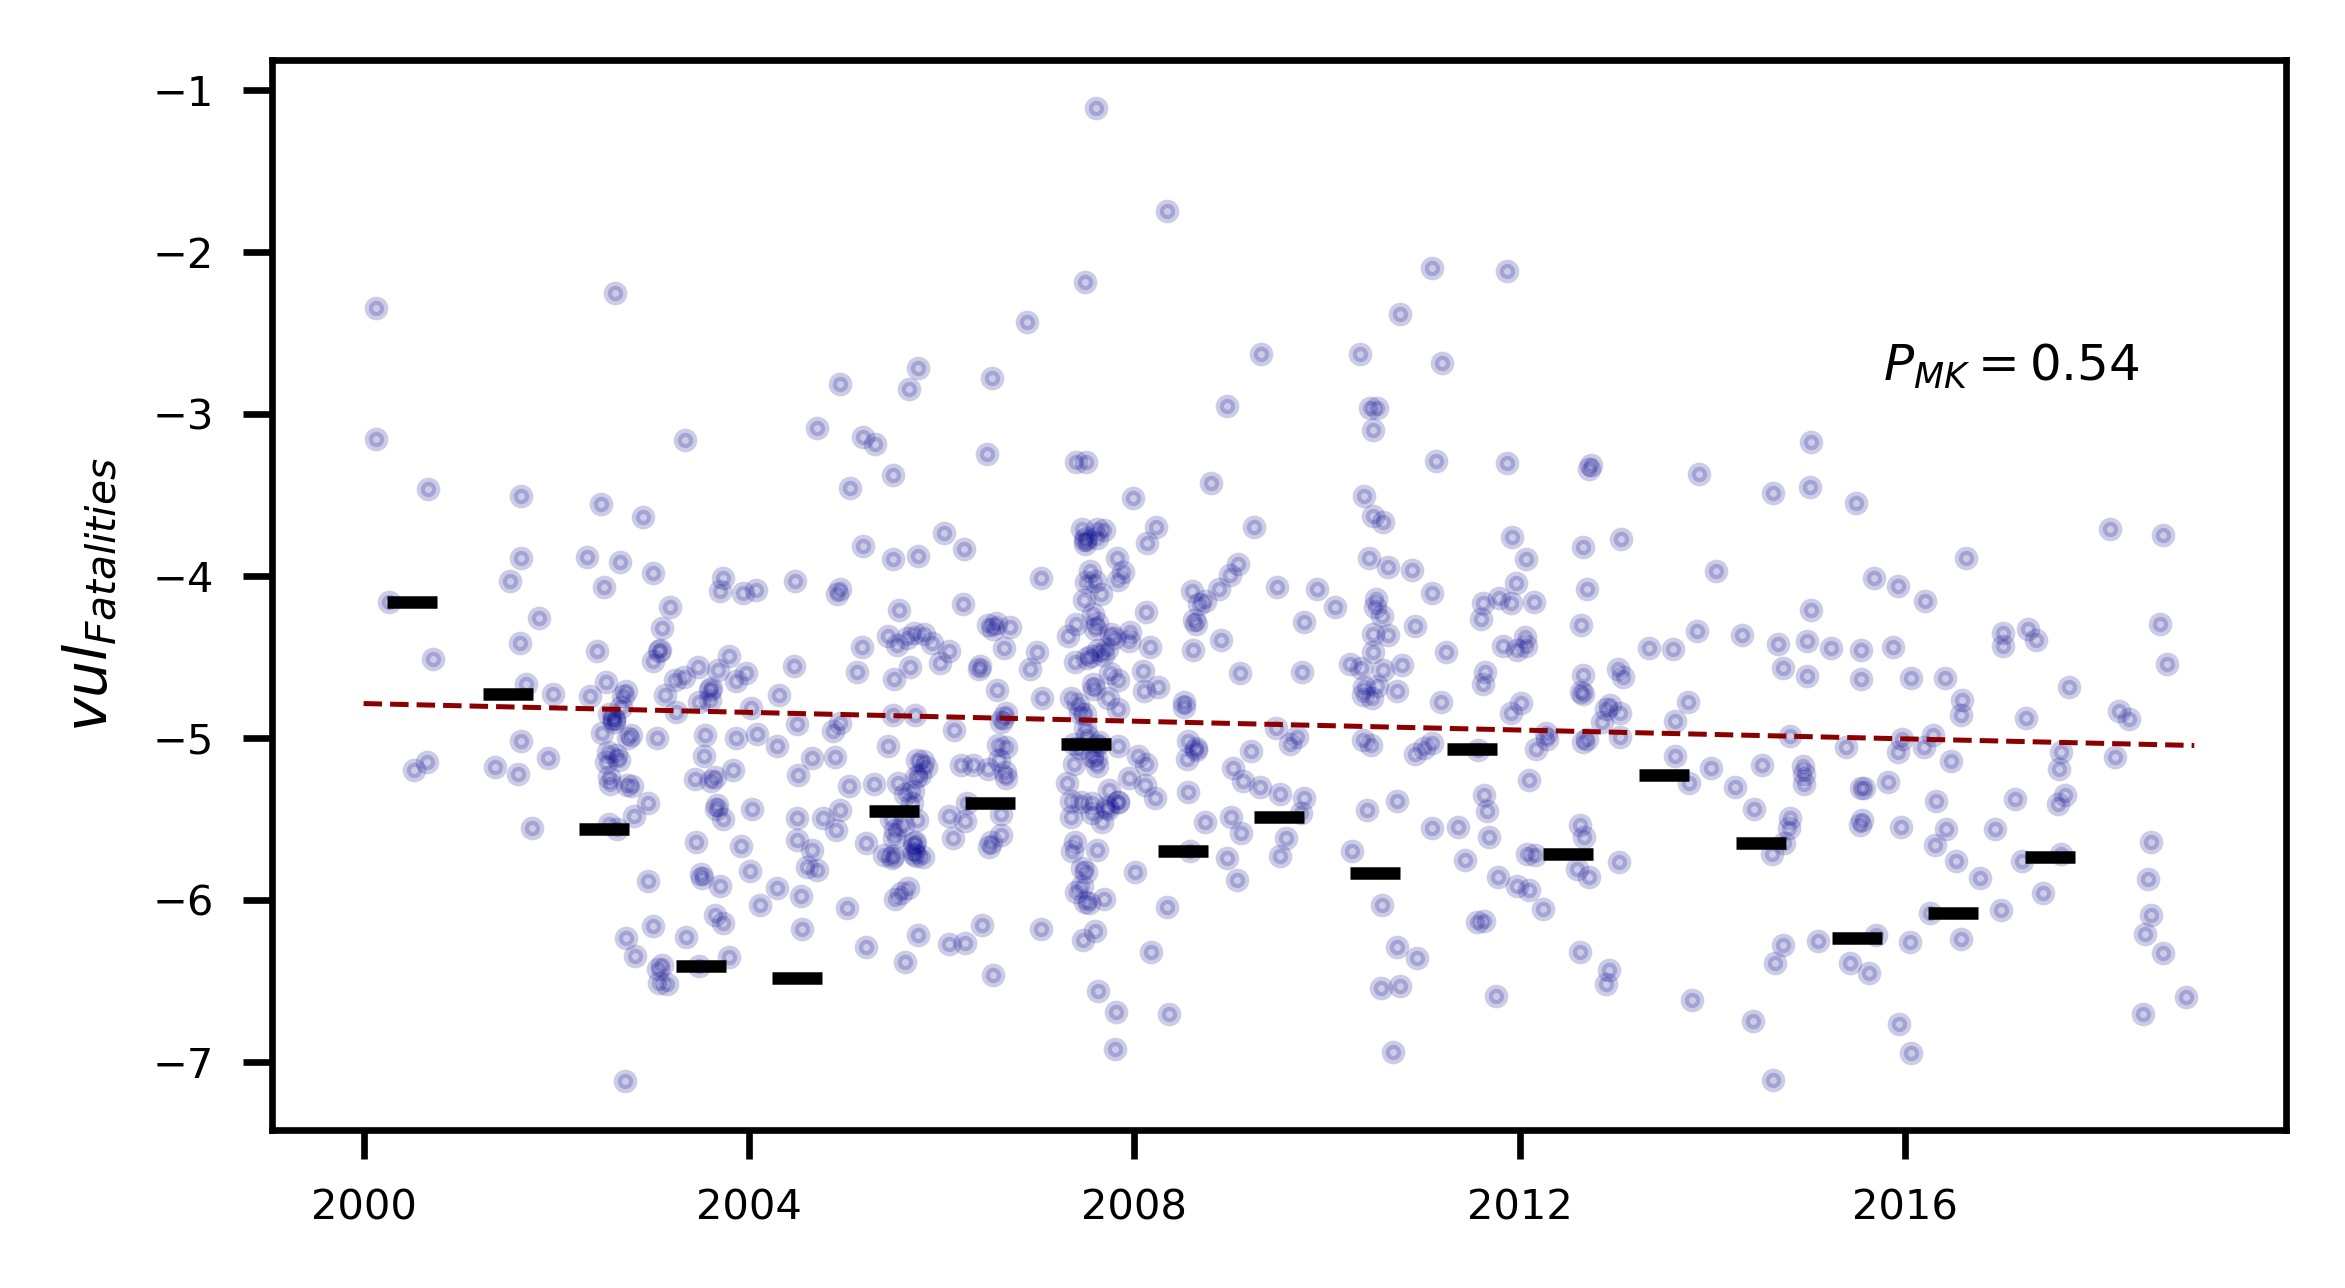

In [149]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)

plt.scatter(dfo['day_plot'], dfo['log_vul_fat'],alpha=0.2, s=3.4,
                          c='darkblue')
plt.scatter(dfo_yearly_medians.index+0.5, dfo_yearly_medians['log_vul_fat'],
                 c='k', marker='_')
df1=pd.DataFrame()
df1['day_plot']=dfo['day_plot']
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig= mk.original_test(dfo['vul_fat'], alpha=0.05)
p=sig.p
r=results.pvalues[1]

plt.plot(np.arange(2000,2020), y, c ='darkred', linewidth=0.6, linestyle='--')

plt.annotate('$P_{MK}=$'+str(np.round(p,2)), (0.8,0.7), xycoords='axes fraction',fontsize=6)
plt.xticks([2000,2004,2008,2012,2016])
plt.ylabel('$vul_{Fatalities}$', fontsize=7)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_temporal_trend.png', dpi=600)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_temporal_trend.pdf')

print('Slope_OLS= '+ str(slope))
print('P_OLS= '+ str(r))
print('Slope_MK= '+ str(sig.slope))
print('P_MK= '+ str(p))



X=dfo_yearly_means.index
X= sm.add_constant(X)

reg1 = sm.OLS(endog=dfo_yearly_means['log_vul_fat'], exog= X, 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig_annual= mk.original_test(dfo_yearly_means['vul_fat'], alpha=0.05)
r=results.pvalues[1]

print('Slope_OLS annual mean= '+ str(slope))
print('P_OLS annual mean= '+ str(r))
print('Slope_MK annual mean= '+ str(sig_annual.slope))
print('P_MK annual mean = '+ str(sig_annual.p))

X=dfo_yearly_medians.index
X= sm.add_constant(X)

reg1 = sm.OLS(endog=dfo_yearly_medians['log_vul_fat'], exog= X, 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig_annual= mk.original_test(dfo_yearly_medians['vul_fat'], alpha=0.05)
r=results.pvalues[1]

print('Slope_OLS annual median= '+ str(slope))
print('P_OLS annual median= '+ str(r))
print('Slope_MK annual median= '+ str(sig_annual.slope))
print('P_MK annual median = '+ str(sig_annual.p))

X=dfo_yearly_means.index[1:]
X= sm.add_constant(X)

reg1 = sm.OLS(endog=dfo_yearly_means['log_vul_fat'].iloc[1:], exog= X, 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig_annual= mk.original_test(dfo_yearly_means['vul_fat'].iloc[1:], alpha=0.05)
r=results.pvalues[1]

print('Slope_OLS annual mean= '+ str(slope))
print('P_OLS annual mean= '+ str(r))
print('Slope_MK annual mean= '+ str(sig_annual.slope))
print('P_MK annual mean = '+ str(sig_annual.p))

# Temporal trends $vul_{Fatalities+1}$

Slope_OLS= -0.021962191053237337
P_OLS= 0.0016133182917320605
Slope_MK= -1.9813892648328353e-09
P_MK= 0.00844485122898675
Slope_OLS annual mean= -0.057100166346803004
P_OLS annual mean= 0.01914758194967143
Slope_MK annual mean= -6.0960271778825435e-06
P_MK annual mean = 0.020940933673740725
Slope_OLS annual median= -0.03986711679198168
P_OLS annual median= 0.13593135937593706
Slope_MK annual median= -2.3492570961078548e-07
P_MK annual median = 0.03580506484519108
Slope_OLS annual mean= -0.04624654477065265
P_OLS annual mean= 0.06824071901174202
Slope_MK annual mean= -4.8089685942523585e-06
P_MK annual mean = 0.05824026959156137


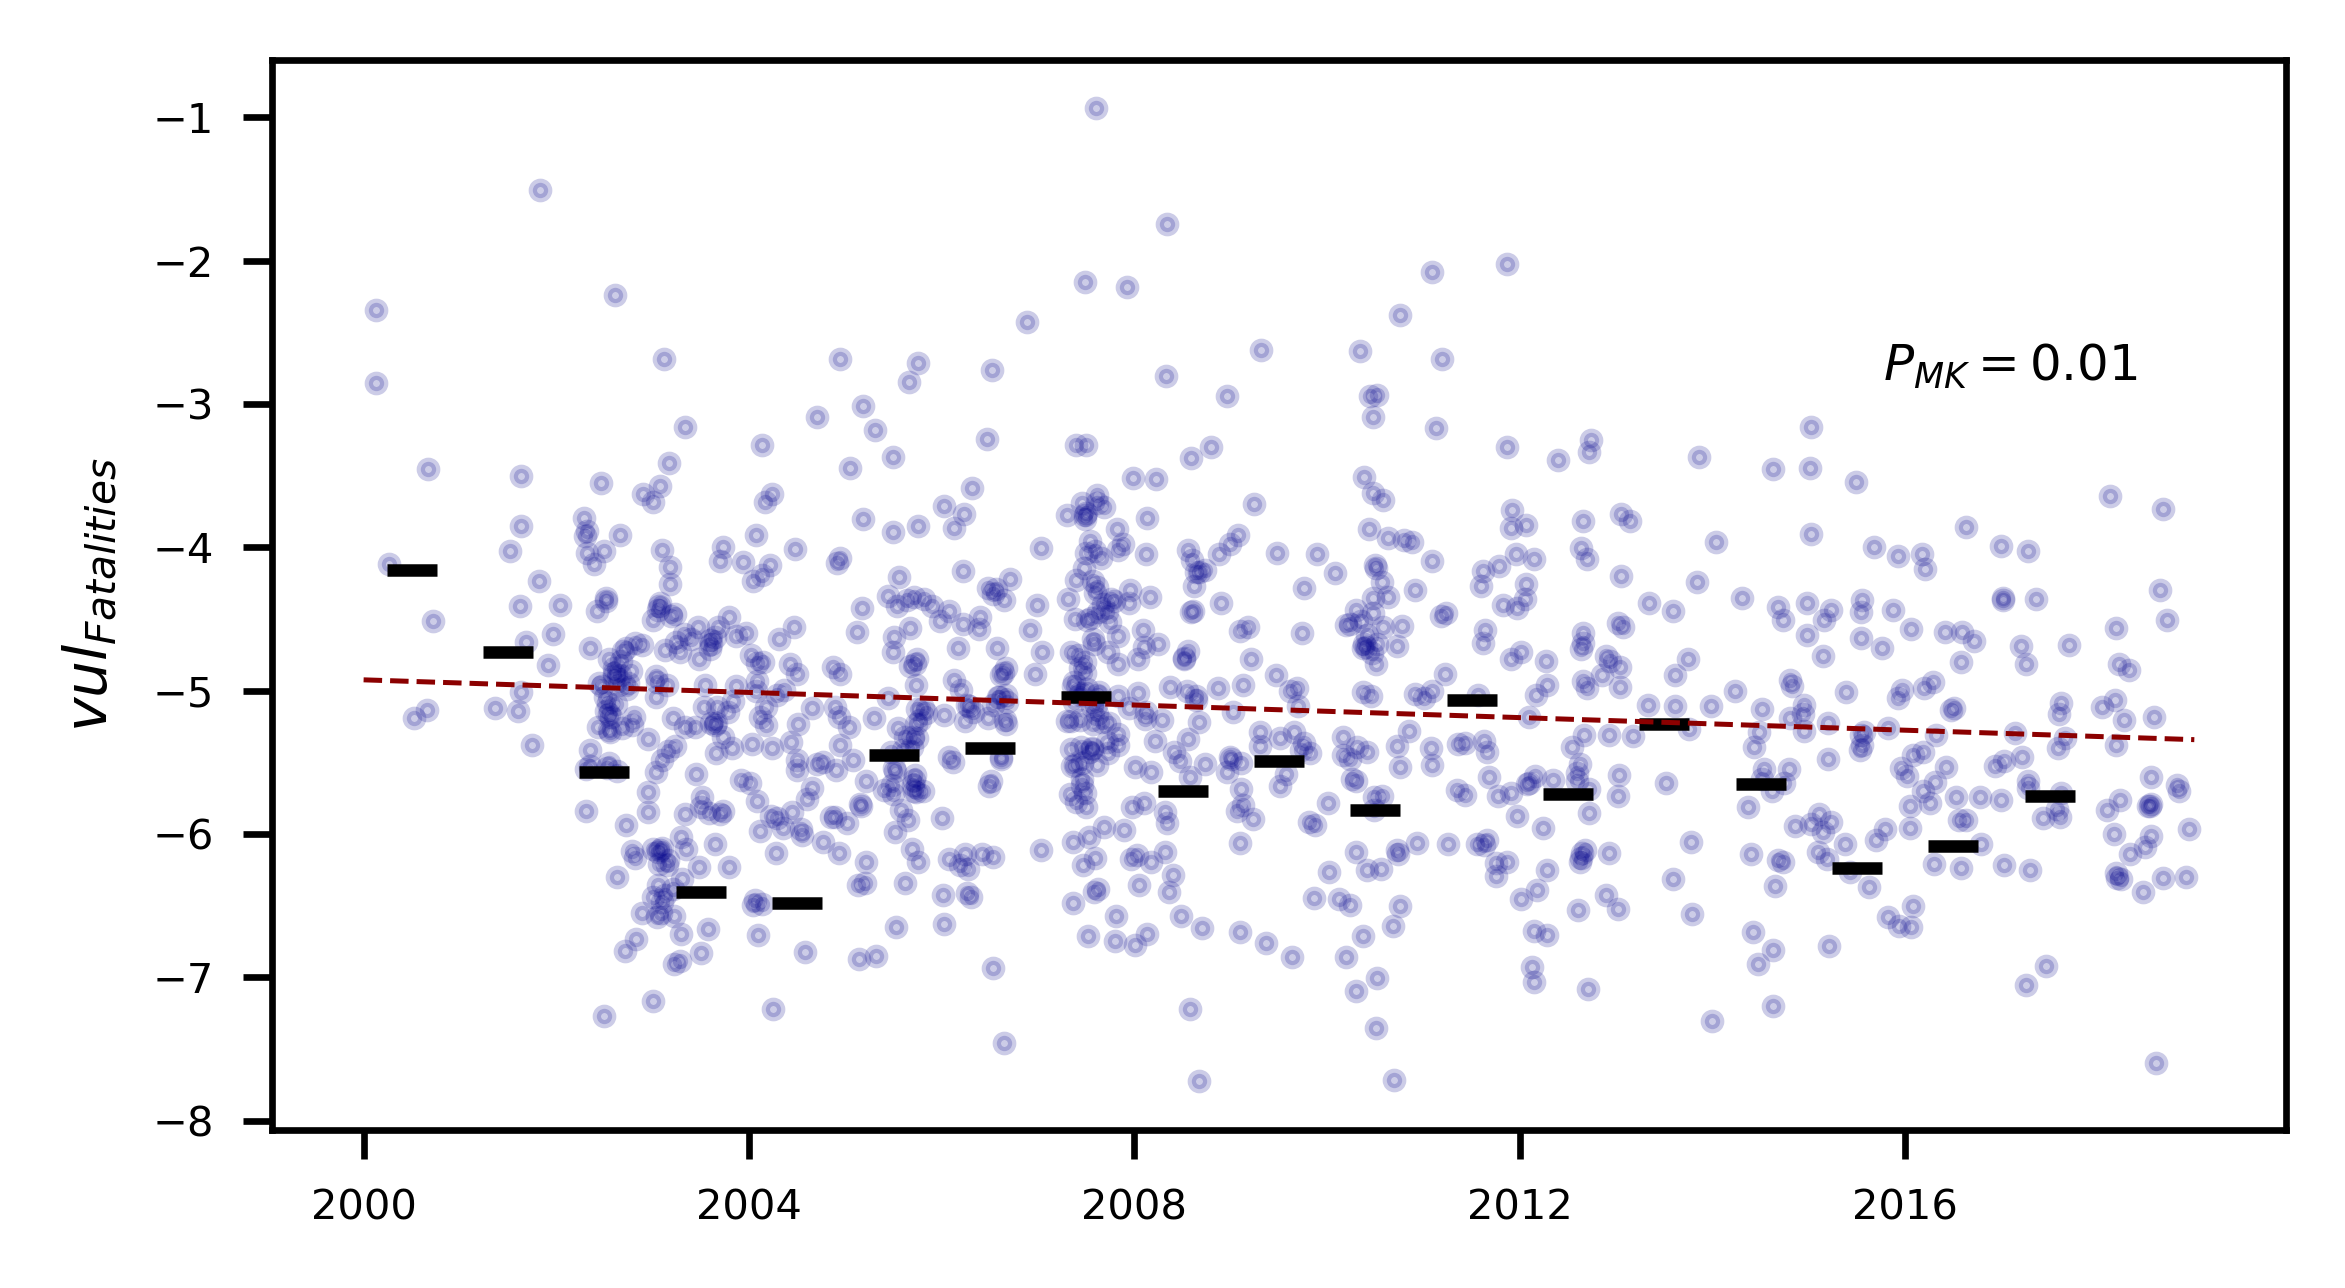

In [150]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)

plt.scatter(dfo['day_plot'], dfo['log_vul_fat_alt'],alpha=0.2, s=3.4,
                          c='darkblue')
plt.scatter(dfo_yearly_medians.index+0.5, dfo_yearly_medians['log_vul_fat'],
                 c='k', marker='_')
df1=pd.DataFrame()
df1['day_plot']=dfo['day_plot']
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat_alt'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig= mk.original_test(dfo['vul_fat_alt'], alpha=0.05)
p=sig.p
r=results.pvalues[1]

plt.plot(np.arange(2000,2020), y, c ='darkred', linewidth=0.6, linestyle='--')

plt.annotate('$P_{MK}=$'+str(np.round(p,2)), (0.8,0.7), xycoords='axes fraction',fontsize=6)
plt.xticks([2000,2004,2008,2012,2016])
plt.ylabel('$vul_{Fatalities}$', fontsize=7)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_temporal_trend.png', dpi=600)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_temporal_trend.pdf')

print('Slope_OLS= '+ str(slope))
print('P_OLS= '+ str(r))
print('Slope_MK= '+ str(sig.slope))
print('P_MK= '+ str(p))



X=dfo_yearly_means.index
X= sm.add_constant(X)

reg1 = sm.OLS(endog=dfo_yearly_means['log_vul_fat'], exog= X, 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig_annual= mk.original_test(dfo_yearly_means['vul_fat'], alpha=0.05)
r=results.pvalues[1]

print('Slope_OLS annual mean= '+ str(slope))
print('P_OLS annual mean= '+ str(r))
print('Slope_MK annual mean= '+ str(sig_annual.slope))
print('P_MK annual mean = '+ str(sig_annual.p))

X=dfo_yearly_medians.index
X= sm.add_constant(X)

reg1 = sm.OLS(endog=dfo_yearly_medians['log_vul_fat'], exog= X, 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig_annual= mk.original_test(dfo_yearly_medians['vul_fat'], alpha=0.05)
r=results.pvalues[1]

print('Slope_OLS annual median= '+ str(slope))
print('P_OLS annual median= '+ str(r))
print('Slope_MK annual median= '+ str(sig_annual.slope))
print('P_MK annual median = '+ str(sig_annual.p))

X=dfo_yearly_means.index[1:]
X= sm.add_constant(X)

reg1 = sm.OLS(endog=dfo_yearly_means['log_vul_fat'].iloc[1:], exog= X, 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig_annual= mk.original_test(dfo_yearly_means['vul_fat'].iloc[1:], alpha=0.05)
r=results.pvalues[1]

print('Slope_OLS annual mean= '+ str(slope))
print('P_OLS annual mean= '+ str(r))
print('Slope_MK annual mean= '+ str(sig_annual.slope))
print('P_MK annual mean = '+ str(sig_annual.p))

## Development effects

In [151]:
#https://hdr.undp.org/data-center/human-development-index#/indicies/HDI
dfo.loc[dfo['HDI_mean']<=0.55, 'development']='low'
dfo.loc[(dfo['HDI_mean']>0.55)&
                   (dfo['HDI_mean']<=0.699)
                   , 'development']='medium'

dfo.loc[(dfo['HDI_mean']>0.699)&
                   (dfo['HDI_mean']<=0.8)
                   , 'development']='high'
dfo.loc[dfo['HDI_mean']>0.8, 'development']='very high'


In [152]:
cmap = plt.cm.get_cmap('Dark2')

high = cmap(0.1)
highmi = cmap(0.4)
lowmi = cmap(0.7)
low=cmap(0.25)
cols=[high, highmi, lowmi, low]

In [153]:
median_colors=['darkgreen','darkmagenta','darkgoldenrod','indigo']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0.0
0.0
0.0
0.0
True


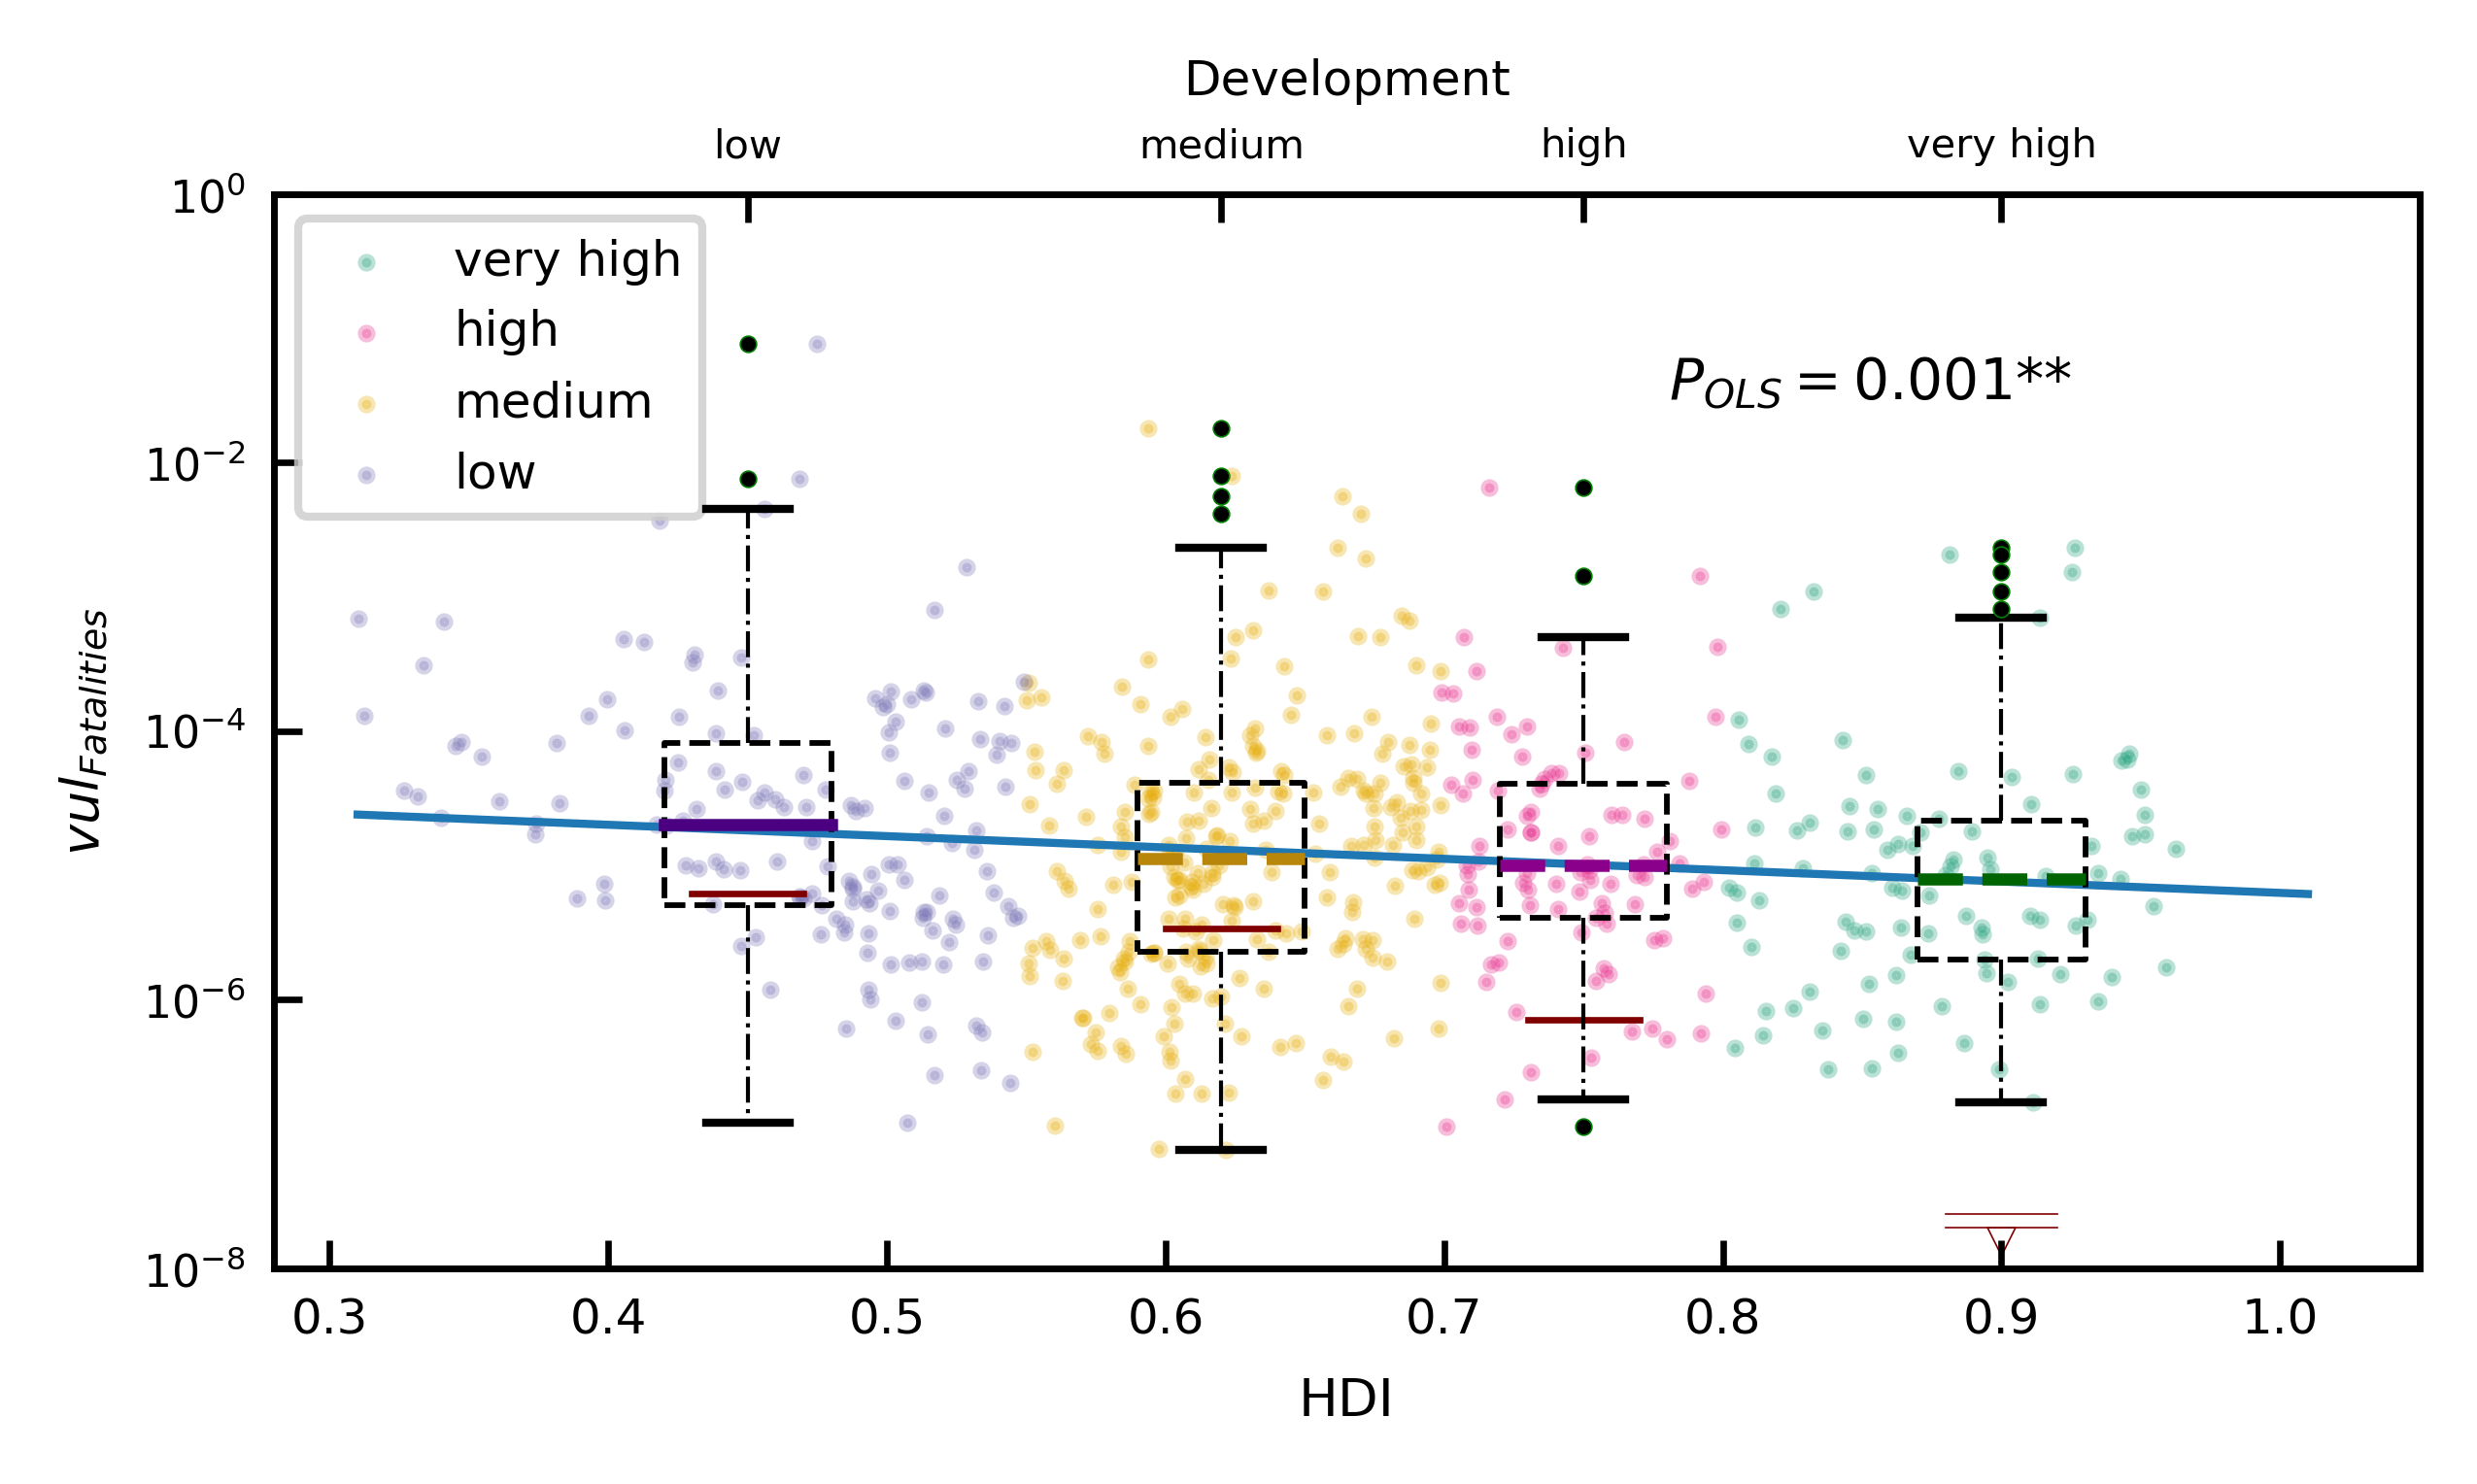

In [154]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.9, bottom= 0.12, left= 0.1, right=0.95, wspace=0., hspace=0.)

dev_groups=['very high','high','medium', 'low']


col_names='development'

var_names=['HDI_mean']
reg_names=['HDI_mean']

fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(1, 1)




flierprops = dict(marker='o', markerfacecolor='black', markersize=2,
                  markeredgecolor='green', markeredgewidth=0.2)
whiskerprops = dict(linestyle='-.', linewidth=0.5, color='k')

titles=[ 'Vulnerability per development level (Assets)',
        'Vulnerability per development level (Fatalities)',
        'Vulnerability per development level (Displacement)']
labels=['very high','high','medium', 'low']

windows=[80,60,40]

v=0
positions=[[0.9,0.75,0.62,0.45]]

variables=['log_vul_fat']

width=[ 0.06]
pos_add=[0.05]

units=['$vul_{Assets}$',
       '$vul_{Fatalities}$']

xticks=[[0.45,0.62,0.75,0.9]]
xlims=[[0.28,1.05]]
xlabel1=[ 'HDI']
xlabel2=[ 'Development']

ls=['a', 'b', 'c']
#rs=['d', 'e', 'f']


f3_ax1 = fig1.add_subplot(gs[0: 1, 0:1])
f3_ax2 = f3_ax1.twiny()


for l,g in enumerate(dev_groups):

    f3_ax1.scatter(dfo.loc[dfo['development']==g,'HDI_mean'],
                dfo.loc[dfo['development']==g,'log_vul_fat'],label=g, alpha=0.3,
                   s=1.4,c=cols[l])

data_list=[]
data_list1=[]
for g in dev_groups:

    data_list.append(dfo.loc[dfo['development']==g,'log_vul_fat'].dropna())
    data_list1.append(dfo.loc[dfo['development']==g,'vul_fat'].replace([-np.inf,np.inf], [np.nan,np.nan]).dropna())
    print(dfo.loc[dfo['development']==g,'vul_fat'].replace([-np.inf,np.inf], [np.nan,np.nan]).dropna().min())

df1=pd.DataFrame()
df1['day']=dfo['HDI_mean'].replace([np.inf,-np.inf], [np.nan,np.nan])
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat'], exog=df1[['const','day']], 
    missing='drop')

results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
            
            
r=results.pvalues['day']



h = np.arange(0.31,1.05,0.05)
y = slope*h + y_ax


if r < 0.05:
    f3_ax1.plot(h,y, linewidth=1.)
else:
    f3_ax1.plot(h,y, linewidth=1., linestyle='--')



if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.65,0.81), xycoords='axes fraction',fontsize=7)
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7)
else:

    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3)), (0.65,0.81), xycoords='axes fraction',fontsize=7)
                

        
labels1=[]
for g in np.arange(len(dev_groups)):
    sig=True

    for h in np.arange(len(dev_groups)):
        if stats.kruskal(data_list[g],data_list[h]).pvalue > 0.1:
            if g !=h:
                sig=False
    labels1.append(sig)

labels2=[]
for g in np.arange(len(dev_groups)):
    sig=True

    for h in np.arange(len(dev_groups)):
        if stats.kruskal(data_list1[g],data_list1[h]).pvalue > 0.1:
            if g !=h:
                sig=False
    labels2.append(sig)

for p, pos in enumerate(positions[0]):
    if labels1[p]:

        boxprops = dict(linestyle='--', linewidth=0.7, color='k')
        medianprops = dict(linestyle='-', linewidth=1.5, color=median_colors[p])
    else:
        boxprops = dict(linestyle='--', linewidth=0.7, color='k')
        medianprops = dict(linestyle='--', linewidth=1.5, color=median_colors[p])
    if labels2[p]:
        
        f3_ax2.plot([pos-width[0]/3,pos+width[0]/3],
                    [np.log10(statistics.median(data_list1[p])),np.log10(statistics.median(data_list1[p]))],
                    color='maroon', linewidth=0.8)
    else:
        f3_ax2.plot([pos-width[0]/3,pos+width[0]/3],
                    [np.log10(statistics.median(data_list1[p])),np.log10(statistics.median(data_list1[p]))],
                    color='maroon', linewidth=0.8, linestyle='--')
    if p==0:
        print(labels2[p])
        f3_ax1.scatter(pos,-7.8, marker='v', color='white', linewidth=0.2,
                        edgecolor='maroon', s=12)
        f3_ax1.plot([pos-width[0]/3, pos+width[0]/3],[-7.7, -7.7],
                    color='maroon', linewidth=0.2)
        f3_ax1.plot([pos-width[0]/3, pos+width[0]/3], [-7.6, -7.6],
                    color='maroon', linewidth=0.2)
    f3_ax2.set_xticklabels(['','','','','',''])


    f3_ax2.boxplot(data_list[p], positions=[pos], labels=[''] , widths=width[0], boxprops=boxprops, flierprops=flierprops, medianprops=medianprops,
           whiskerprops=whiskerprops)
        
        #f3_ax1.legend(fontsize=6, markerscale=2)

f3_ax1.set_xlim(xlims[0])
f3_ax2.set_xlim(xlims[0])
f3_ax1.set_ylim([-8,0])
f3_ax2.set_ylim([-8,0])
f3_ax1.legend(fontsize=6, loc='upper left')
f3_ax1.tick_params(axis='both', which='both', labelsize=6, direction='in')
f3_ax2.tick_params(axis='both', which='both', labelsize=6, direction='in')
#f3_ax3.tick_params(axis='both', which='major', labelsize=6, direction='in')

f3_ax2.set_xticklabels(labels,fontsize=5)
f3_ax2.set_xlabel(xlabel2[0],fontsize=6)
#f3_ax1.set_ylabel(units[i], fontsize=6)


f3_ax1.set_yticks([-8,-6,-4,-2, 0])
f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)


f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=6.5)
f3_ax1.set_xlabel(xlabel1[0], fontsize=6.5)
f3_ax2.set_xticks(positions[0])
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_HDI_trend.png', dpi=600)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_HDI_trend.pdf')

# Development effects $vul_{Fatalities+1}$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

4.9536339858920505e-08
5.967153208448773e-08
2.5236315380857892e-08
1.8937553266602952e-08
False


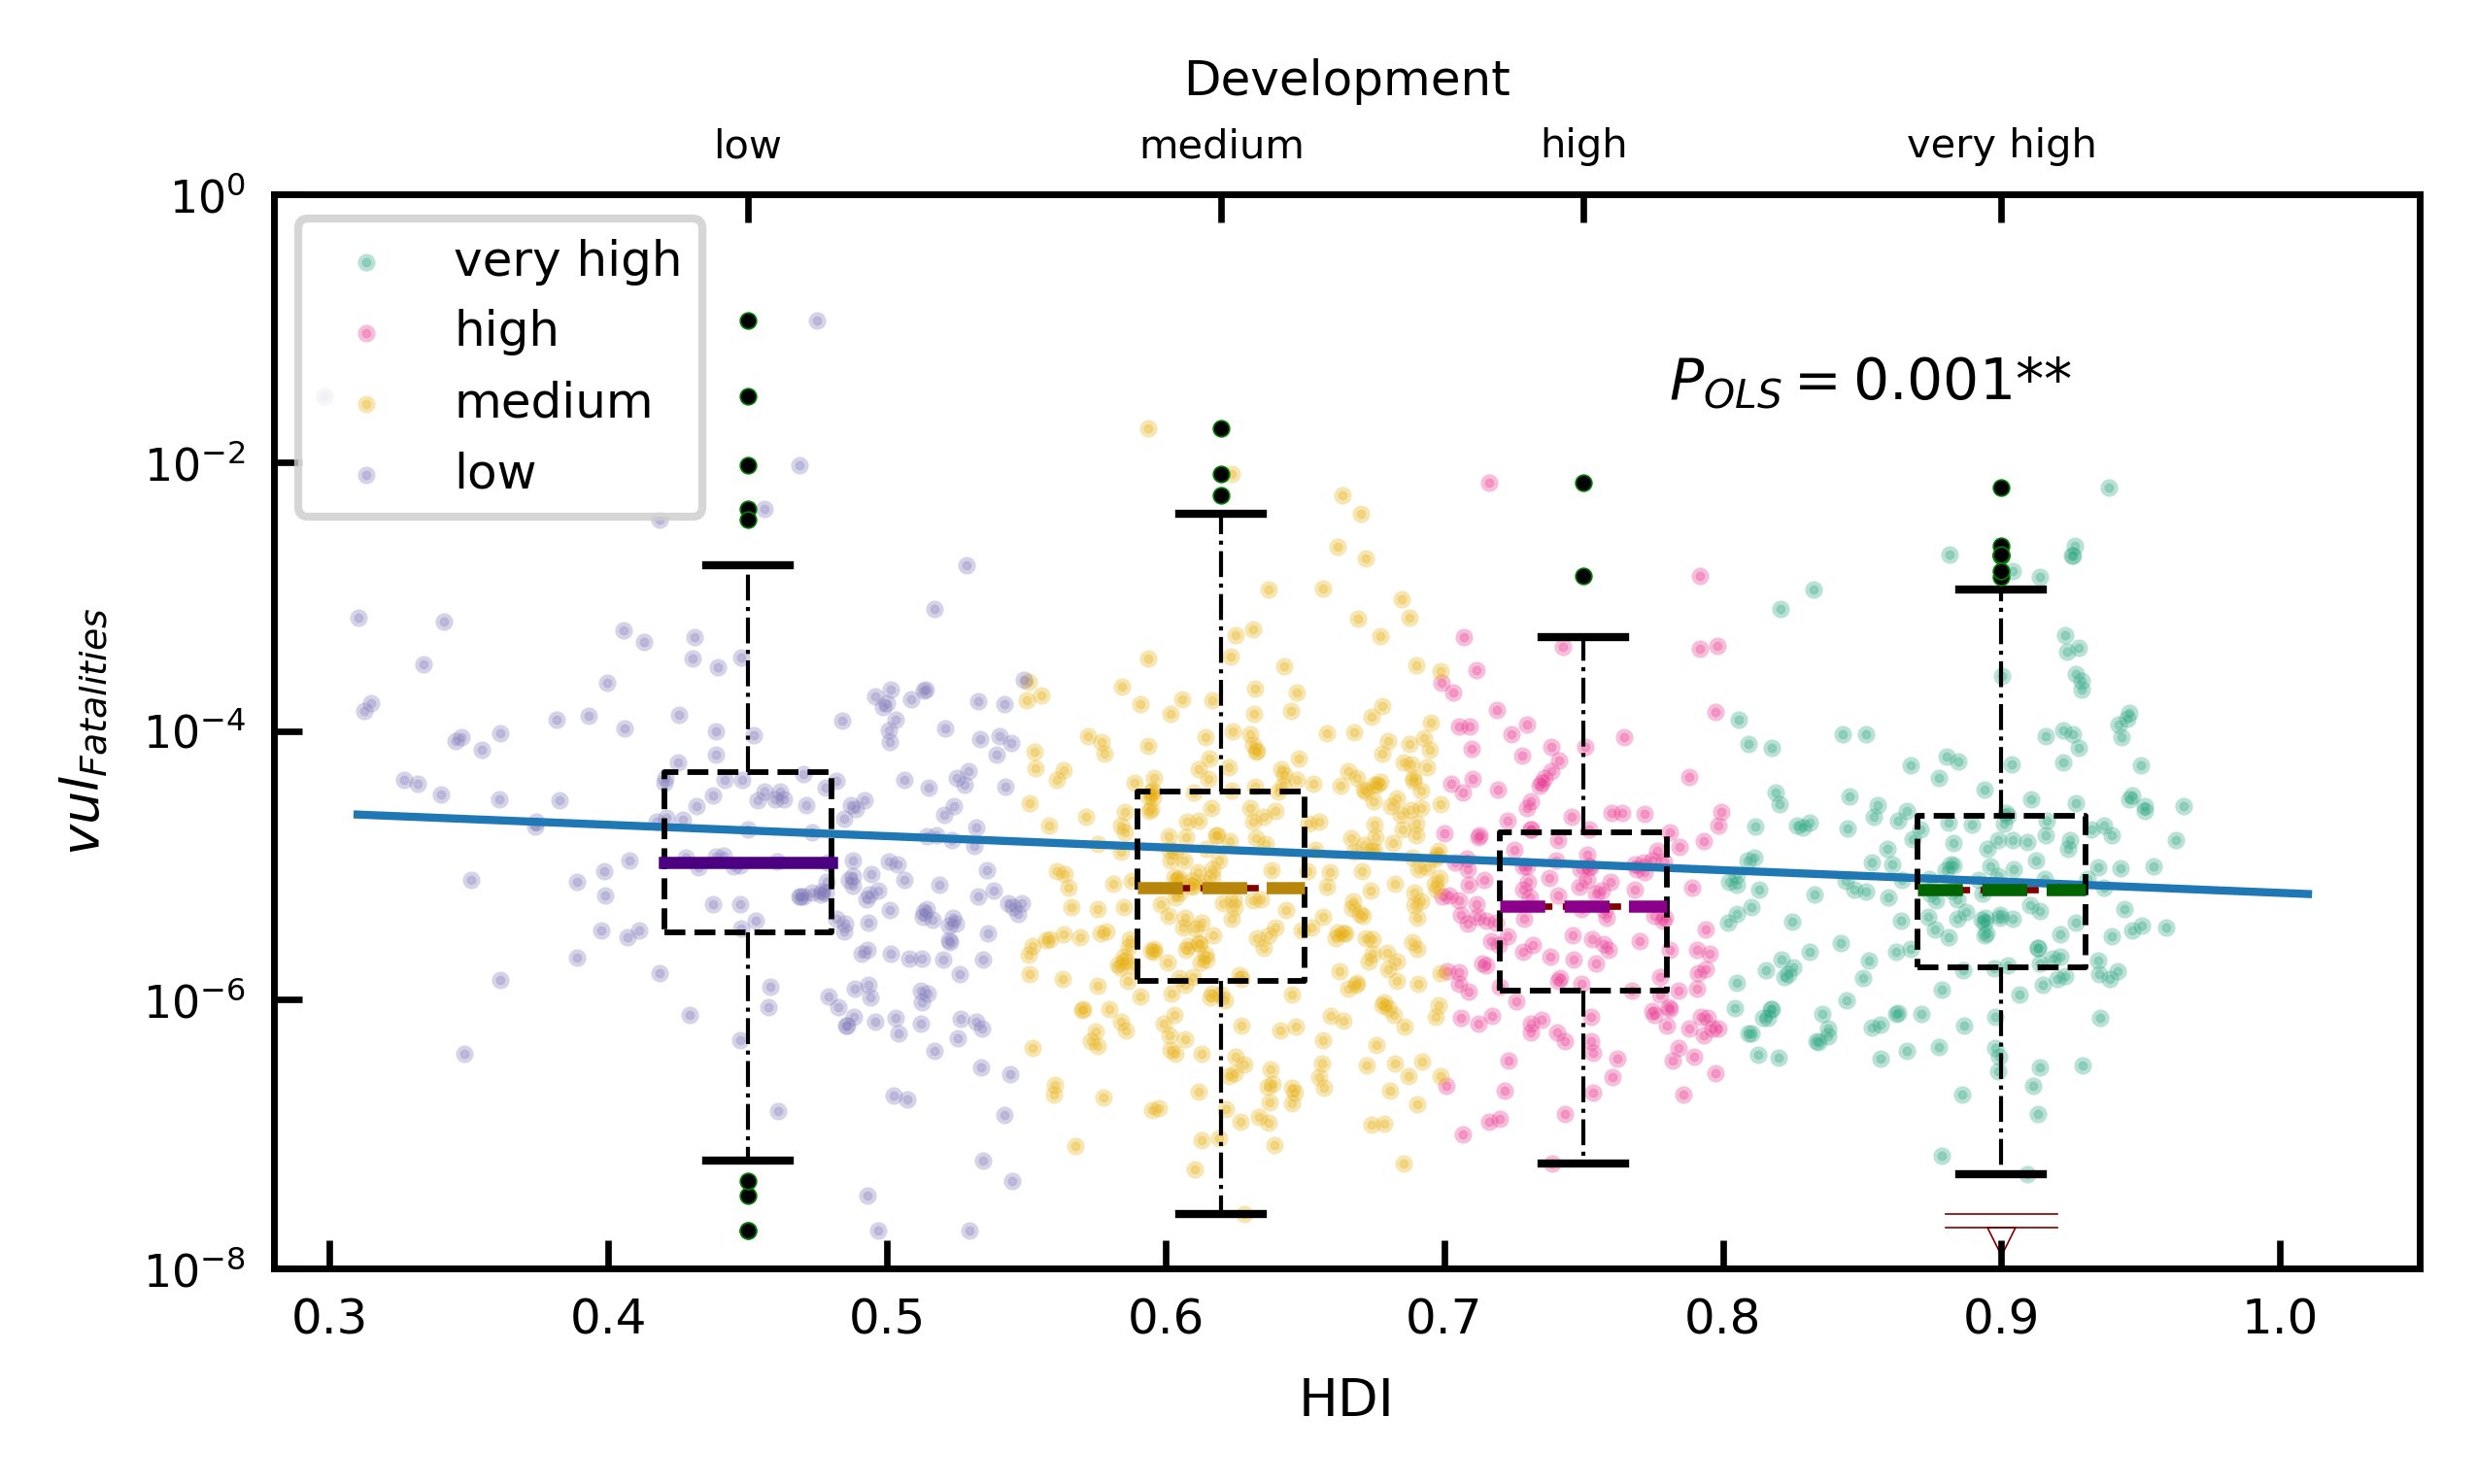

In [155]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.9, bottom= 0.12, left= 0.1, right=0.95, wspace=0., hspace=0.)

dev_groups=['very high','high','medium', 'low']


col_names='development'

var_names=['HDI_mean']
reg_names=['HDI_mean']

fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(1, 1)




flierprops = dict(marker='o', markerfacecolor='black', markersize=2,
                  markeredgecolor='green', markeredgewidth=0.2)
whiskerprops = dict(linestyle='-.', linewidth=0.5, color='k')

titles=[ 'Vulnerability per development level (Assets)',
        'Vulnerability per development level (Fatalities)',
        'Vulnerability per development level (Displacement)']
labels=['very high','high','medium', 'low']

windows=[80,60,40]

v=0
positions=[[0.9,0.75,0.62,0.45]]

variables=['log_vul_fat']

width=[ 0.06]
pos_add=[0.05]

units=['$vul_{Assets}$',
       '$vul_{Fatalities}$']

xticks=[[0.45,0.62,0.75,0.9]]
xlims=[[0.28,1.05]]
xlabel1=[ 'HDI']
xlabel2=[ 'Development']

ls=['a', 'b', 'c']
#rs=['d', 'e', 'f']


f3_ax1 = fig1.add_subplot(gs[0: 1, 0:1])
f3_ax2 = f3_ax1.twiny()


for l,g in enumerate(dev_groups):

    f3_ax1.scatter(dfo.loc[dfo['development']==g,'HDI_mean'],
                dfo.loc[dfo['development']==g,'log_vul_fat_alt'],label=g, alpha=0.3,
                   s=1.4,c=cols[l])

data_list=[]
data_list1=[]
for g in dev_groups:

    data_list.append(dfo.loc[dfo['development']==g,'log_vul_fat_alt'].dropna())
    data_list1.append(dfo.loc[dfo['development']==g,'vul_fat_alt'].replace([-np.inf,np.inf], [np.nan,np.nan]).dropna())
    print(dfo.loc[dfo['development']==g,'vul_fat_alt'].replace([-np.inf,np.inf], [np.nan,np.nan]).dropna().min())

df1=pd.DataFrame()
df1['day']=dfo['HDI_mean'].replace([np.inf,-np.inf], [np.nan,np.nan])
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat'], exog=df1[['const','day']], 
    missing='drop')

results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
            
            
r=results.pvalues['day']



h = np.arange(0.31,1.05,0.05)
y = slope*h + y_ax


if r < 0.05:
    f3_ax1.plot(h,y, linewidth=1.)
else:
    f3_ax1.plot(h,y, linewidth=1., linestyle='--')



if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.65,0.81), xycoords='axes fraction',fontsize=7)
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7)
else:

    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3)), (0.65,0.81), xycoords='axes fraction',fontsize=7)
                

        
labels1=[]
for g in np.arange(len(dev_groups)):
    sig=True

    for h in np.arange(len(dev_groups)):
        if stats.kruskal(data_list[g],data_list[h]).pvalue > 0.1:
            if g !=h:
                sig=False
    labels1.append(sig)

labels2=[]
for g in np.arange(len(dev_groups)):
    sig=True

    for h in np.arange(len(dev_groups)):
        if stats.kruskal(data_list1[g],data_list1[h]).pvalue > 0.1:
            if g !=h:
                sig=False
    labels2.append(sig)

for p, pos in enumerate(positions[0]):
    if labels1[p]:

        boxprops = dict(linestyle='--', linewidth=0.7, color='k')
        medianprops = dict(linestyle='-', linewidth=1.5, color=median_colors[p])
    else:
        boxprops = dict(linestyle='--', linewidth=0.7, color='k')
        medianprops = dict(linestyle='--', linewidth=1.5, color=median_colors[p])
    if labels2[p]:
        
        f3_ax2.plot([pos-width[0]/3,pos+width[0]/3],
                    [np.log10(statistics.median(data_list1[p])),np.log10(statistics.median(data_list1[p]))],
                    color='maroon', linewidth=0.8)
    else:
        f3_ax2.plot([pos-width[0]/3,pos+width[0]/3],
                    [np.log10(statistics.median(data_list1[p])),np.log10(statistics.median(data_list1[p]))],
                    color='maroon', linewidth=0.8, linestyle='--')
    if p==0:
        print(labels2[p])
        f3_ax1.scatter(pos,-7.8, marker='v', color='white', linewidth=0.2,
                        edgecolor='maroon', s=12)
        f3_ax1.plot([pos-width[0]/3, pos+width[0]/3],[-7.7, -7.7],
                    color='maroon', linewidth=0.2)
        f3_ax1.plot([pos-width[0]/3, pos+width[0]/3], [-7.6, -7.6],
                    color='maroon', linewidth=0.2)
    f3_ax2.set_xticklabels(['','','','','',''])


    f3_ax2.boxplot(data_list[p], positions=[pos], labels=[''] , widths=width[0], boxprops=boxprops, flierprops=flierprops, medianprops=medianprops,
           whiskerprops=whiskerprops)
        
        #f3_ax1.legend(fontsize=6, markerscale=2)

f3_ax1.set_xlim(xlims[0])
f3_ax2.set_xlim(xlims[0])
f3_ax1.set_ylim([-8,0])
f3_ax2.set_ylim([-8,0])
f3_ax1.legend(fontsize=6, loc='upper left')
f3_ax1.tick_params(axis='both', which='both', labelsize=6, direction='in')
f3_ax2.tick_params(axis='both', which='both', labelsize=6, direction='in')
#f3_ax3.tick_params(axis='both', which='major', labelsize=6, direction='in')

f3_ax2.set_xticklabels(labels,fontsize=5)
f3_ax2.set_xlabel(xlabel2[0],fontsize=6)
#f3_ax1.set_ylabel(units[i], fontsize=6)


f3_ax1.set_yticks([-8,-6,-4,-2, 0])
f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)


f3_ax1.set_ylabel('$vul_{Fatalities}$', fontsize=6.5)
f3_ax1.set_xlabel(xlabel1[0], fontsize=6.5)
f3_ax2.set_xticks(positions[0])

In [156]:
dfo.columns

Index(['DFO_ID', 'year_x', 'DFO_satellite_shape_area_x', 'affected_sum_GHSL_x',
       'affected_mean_GHSL_x', 'DFO_satellite_shape_pop_density_GHSL_x',
       'affected_sum_GPW_x', 'affected_mean_GPW_x',
       'DFO_satellite_shape_pop_density_GPW_x', 'year_y',
       'DFO_satellite_shape_area_y', 'affected_sum_GHSL_y',
       'affected_mean_GHSL_y', 'DFO_satellite_shape_pop_density_GHSL_y',
       'affected_sum_GPW_y', 'affected_mean_GPW_y',
       'DFO_satellite_shape_pop_density_GPW_y', 'GDP_affected_sum',
       'cable_affected_sum', 'plant_affected_sum', 'power_pole_affected_sum',
       'power_tower_affected_sum', 'line_affected_sum', 'mast_affected_sum',
       'communication_tower_affected_sum', 'doctors_affected_sum',
       'hospital_affected_sum', 'pharmacy_affected_sum',
       'primary_road_affected_sum', 'tertiary_road_affected_sum',
       'reservoir_affected_sum', 'school_affected_sum',
       'university_affected_sum', 'GDP_affected_mean',
       'education_affected_m

# CISI

In [157]:
dfo['log_CISI_global_affected_mean']=np.log10(dfo['CISI_global_affected_mean']).replace([np.inf,-np.inf],[np.nan,np.nan])

/home/insauer/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


1.3721027363019865e-28


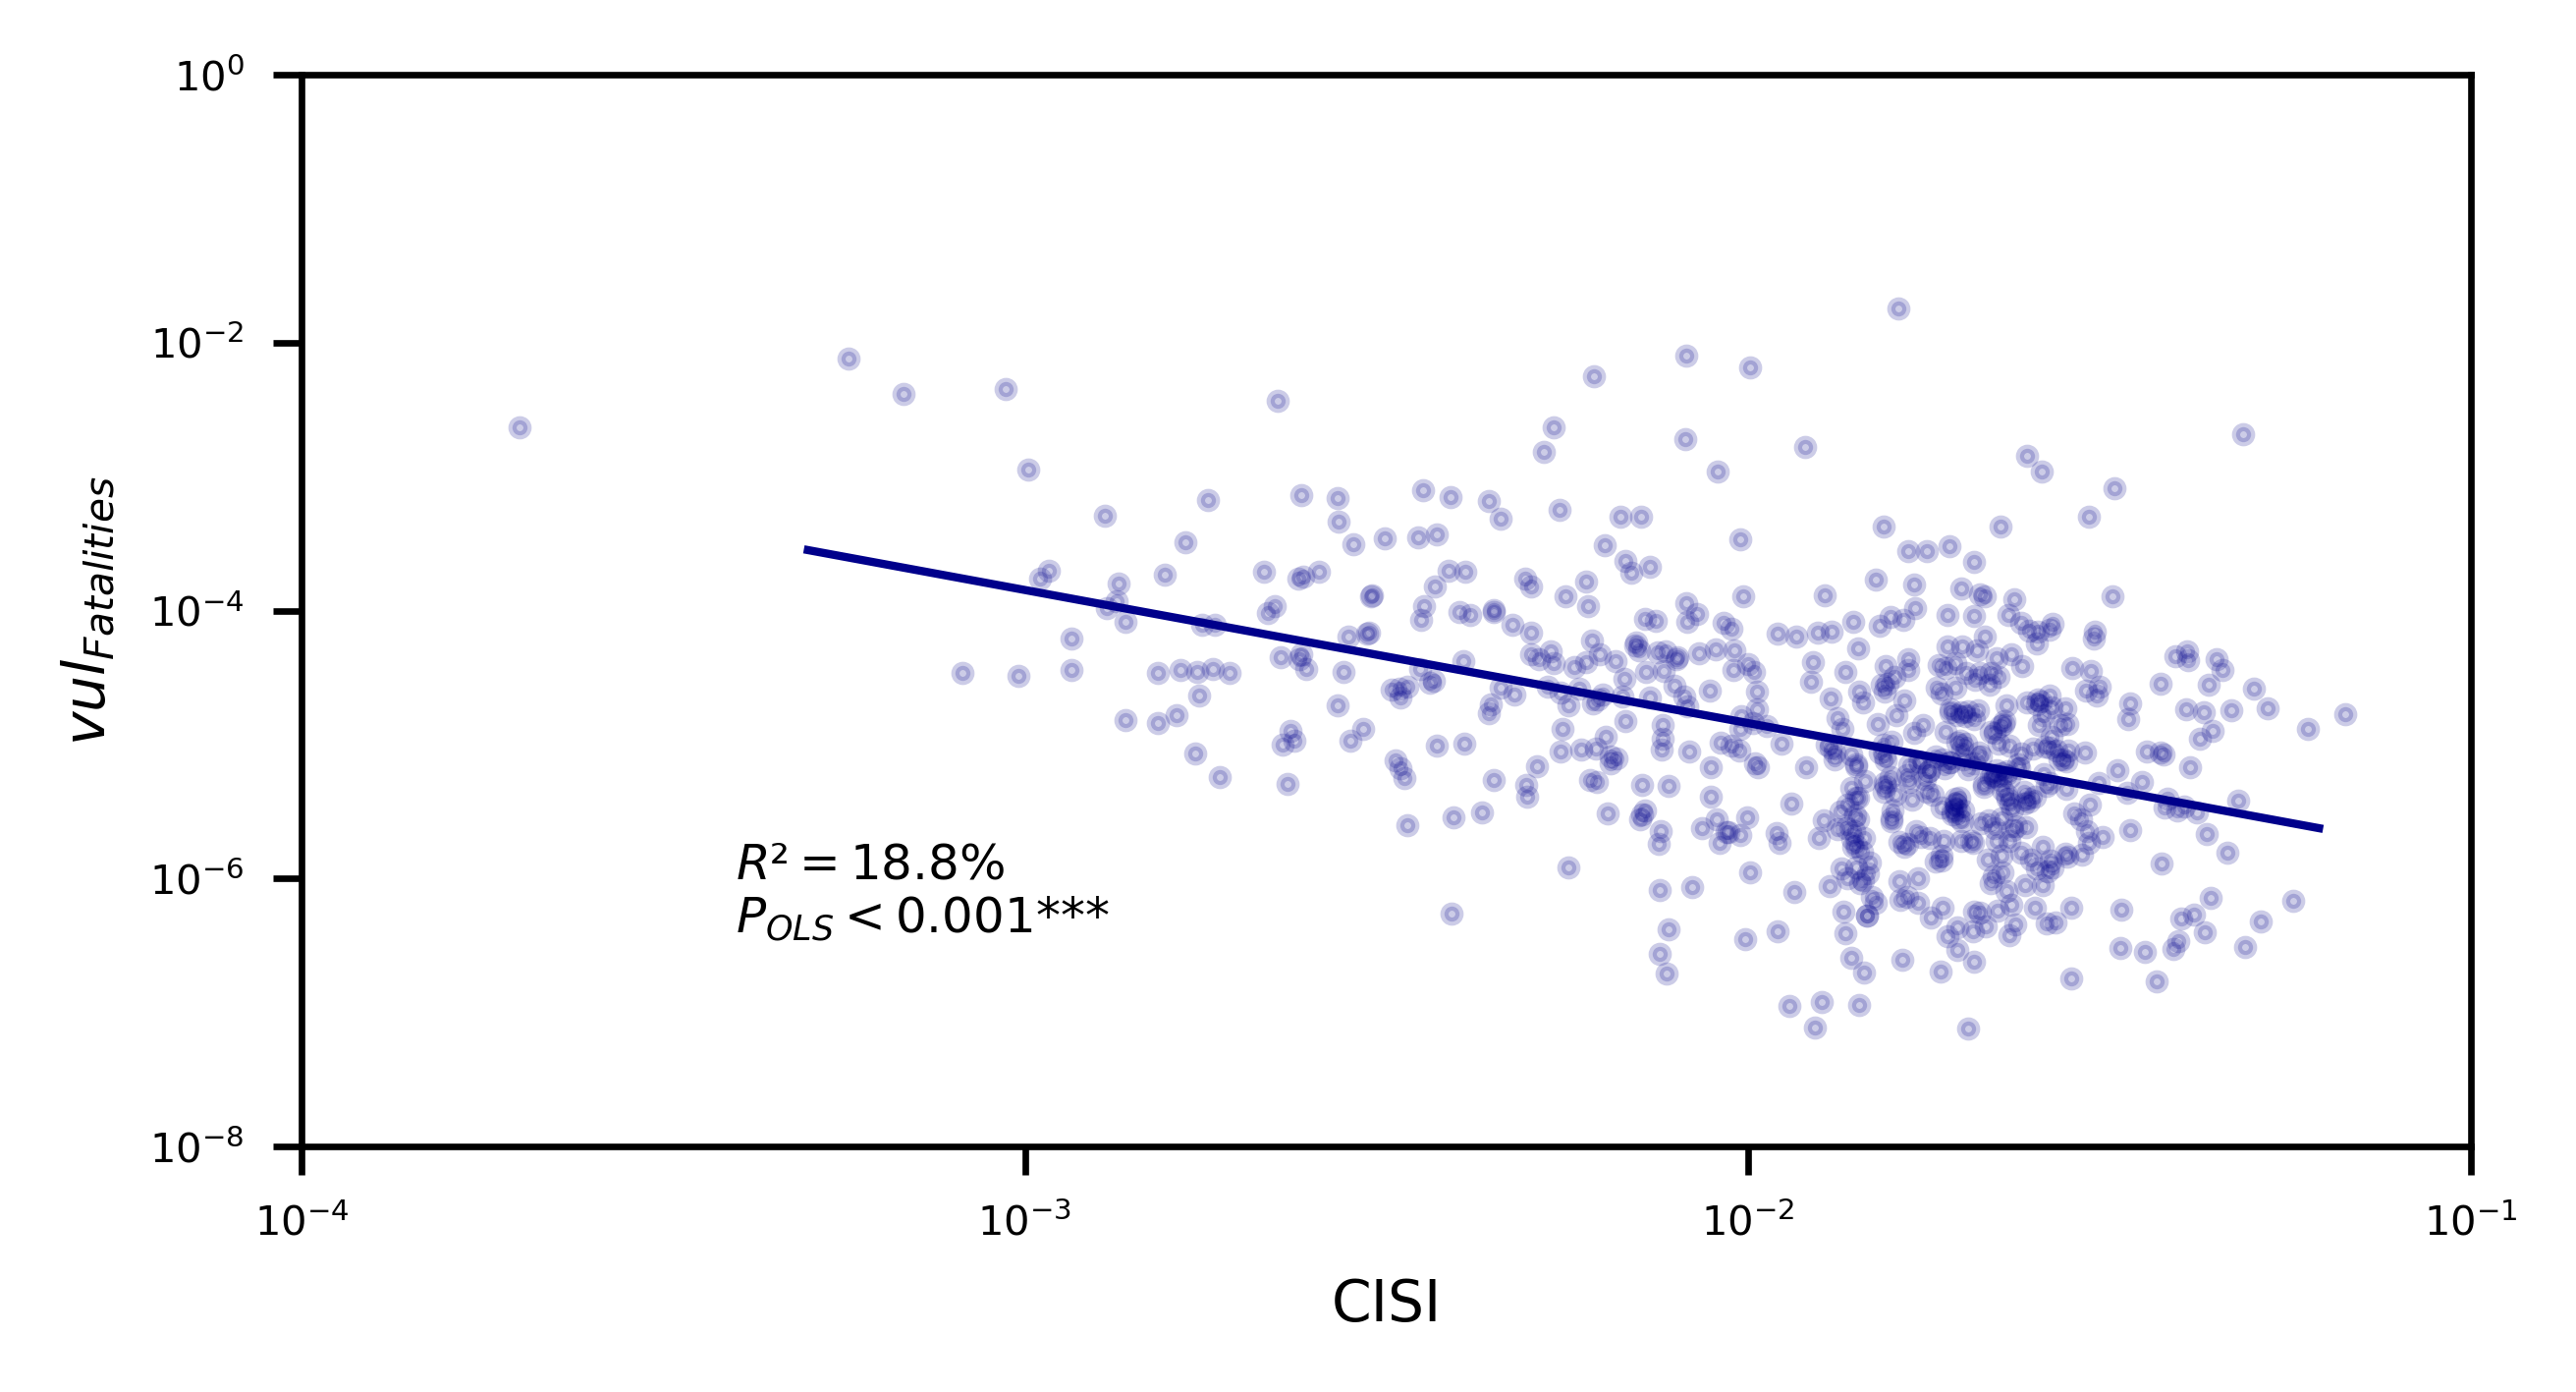

In [158]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.9, bottom= 0.13, left= 0.1, right=0.95, wspace=0., hspace=0.)

plt.scatter(dfo['log_CISI_global_affected_mean'], dfo['log_vul_fat'],alpha=0.2, s=3.4,
                          c='darkblue')

df1=pd.DataFrame()
df1['day_plot']=dfo['log_CISI_global_affected_mean']
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(-3.3,-1.2,0.01) + y_ax

r=results.pvalues[1]
R2=results.rsquared
print(r)
plt.plot(np.arange(-3.3,-1.2,0.01), y, c ='darkblue', linewidth=1)

plt.yticks([-8,-6,-4,-2,0],['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)

plt.xticks([-4,-3,-2,-1],['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'], fontsize=5.5)
plt.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.2,0.2), xycoords='axes fraction',fontsize=6)
plt.annotate('$R² =}$'+str(np.round(R2*100,1))+'%', (0.2,0.25), xycoords='axes fraction',fontsize=6)
#plt.xticks([2000,2004,2008,2012,2016])
plt.ylabel('$vul_{Fatalities}$', fontsize=7)
plt.xlabel('CISI', fontsize=7)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_CISI.png', dpi=600)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_CISI.pdf')

# CISI $vul_{Fatalities+1}$

1.3721027363019865e-28


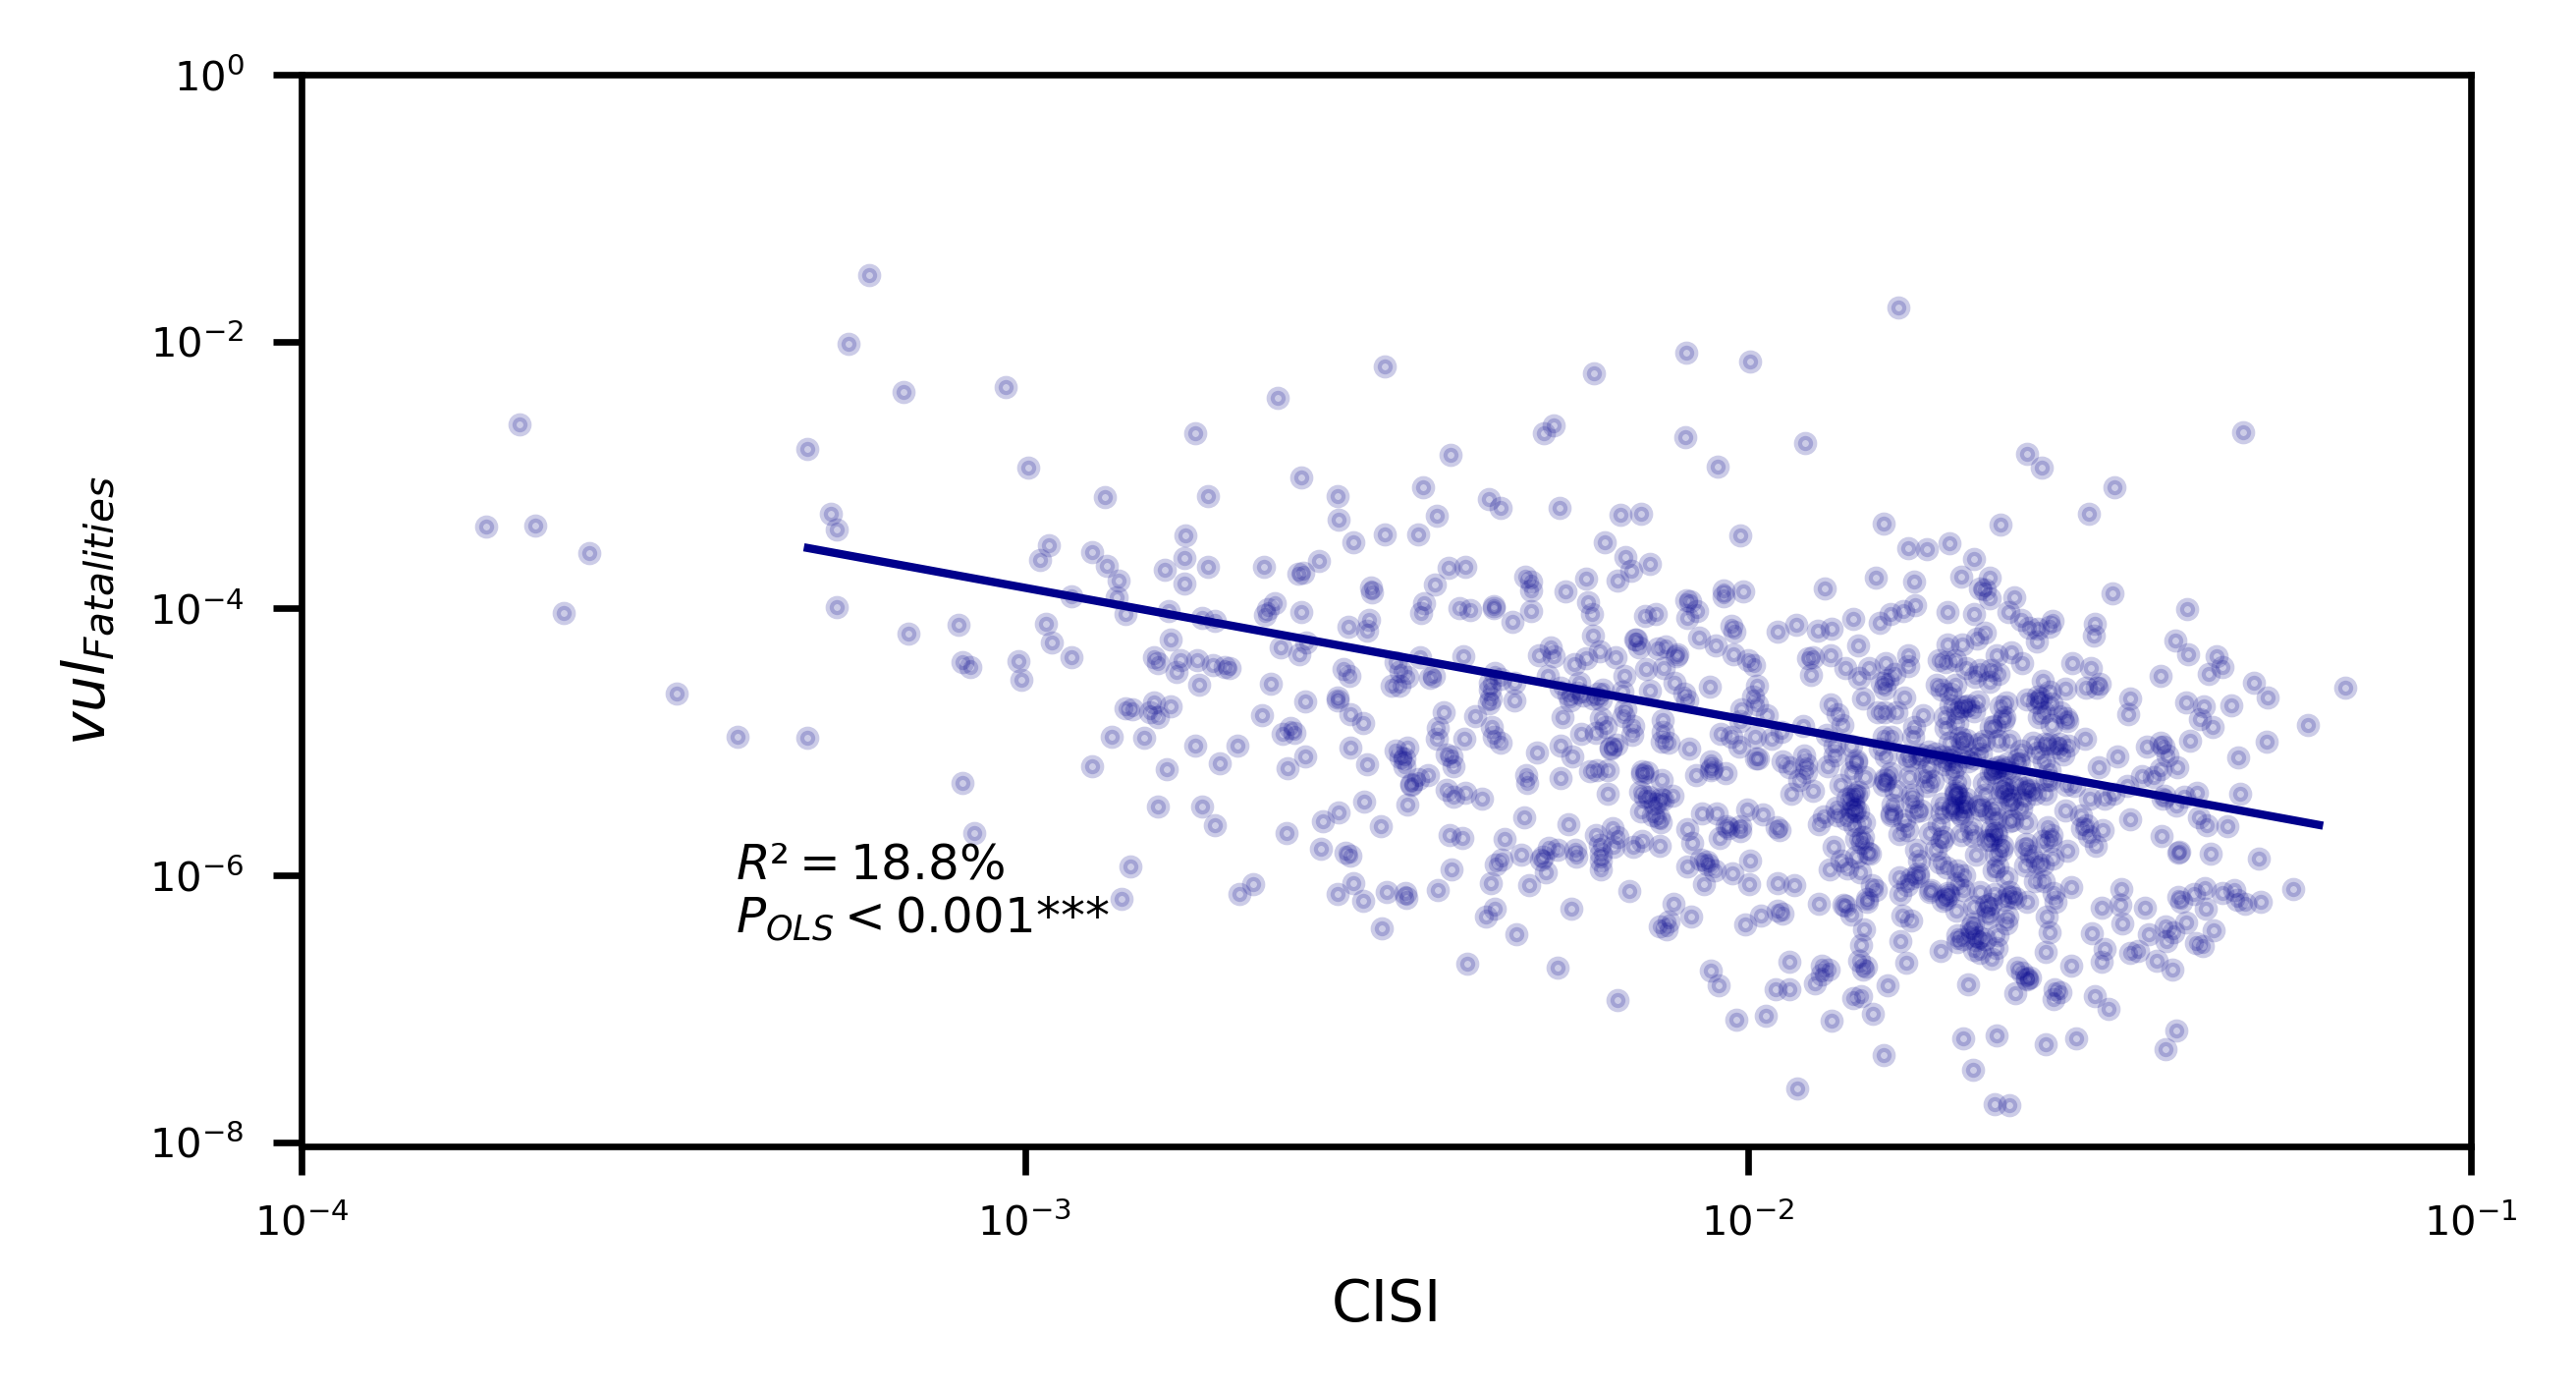

In [159]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.9, bottom= 0.13, left= 0.1, right=0.95, wspace=0., hspace=0.)

plt.scatter(dfo['log_CISI_global_affected_mean'], dfo['log_vul_fat_alt'],alpha=0.2, s=3.4,
                          c='darkblue')

df1=pd.DataFrame()
df1['day_plot']=dfo['log_CISI_global_affected_mean']
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(-3.3,-1.2,0.01) + y_ax

r=results.pvalues[1]
R2=results.rsquared
print(r)
plt.plot(np.arange(-3.3,-1.2,0.01), y, c ='darkblue', linewidth=1)

plt.yticks([-8,-6,-4,-2,0],['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)

plt.xticks([-4,-3,-2,-1],['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'], fontsize=5.5)
plt.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.2,0.2), xycoords='axes fraction',fontsize=6)
plt.annotate('$R² =}$'+str(np.round(R2*100,1))+'%', (0.2,0.25), xycoords='axes fraction',fontsize=6)
#plt.xticks([2000,2004,2008,2012,2016])
plt.ylabel('$vul_{Fatalities}$', fontsize=7)
plt.xlabel('CISI', fontsize=7)
plt.tick_params(axis='both', which='major', labelsize=5)

## Events without fatalities

In [160]:
dfo['events']=1

In [161]:
dfo_0=dfo.loc[dfo['fatalities']==0]
dfo_annual=dfo.groupby('year_x').sum()
dfo_annual_0=dfo_0.groupby('year_x').sum()

In [162]:
dfo_annual['share_0_events']=(100*dfo_annual_0['events'])/(dfo_annual['events'])
dfo_annual['pop_per_0']=dfo_annual_0['affected_sum_GPW_x']/(dfo_annual_0['events']*1000000)

In [163]:
dfo_annual

DFO_ID  DFO_satellite_shape_area_x  affected_sum_GHSL_x  \
year_x                                                            
2000     11281                3.030824e+04           50917860.0   
2001     23293                2.235302e+05           23377319.0   
2002    122689                8.630010e+05          264754895.0   
2003    198994                1.476570e+06          379109982.0   
2004    159837                1.018608e+06          381347580.0   
2005    183198                9.398669e+05          375820496.0   
2006    169848                9.918717e+05          292399397.0   
2007    326610                1.607084e+06          666300003.0   
2008    202788                8.092699e+05          252916625.0   
2009    136296                3.851163e+05          106911018.0   
2010    249903                1.132825e+06          296532728.0   
2011    161206                6.289705e+05          167134812.0   
2012    197385                7.292410e+05          180362242.0   
2013    105475                4.743007e+05           72243715.0   
2014    137746                4.149949e+05          211137056.0   
2015    162058                4.684712e+05          144385699.0   
2016    152669                4.826426e+05          109724434.0   
2017    107342                3.197471e+05          106888076.0   
2018    148157                4.822081e+05          144111245.0   

        affected_mean_GHSL_x  DFO_satellite_shape_pop_density_GHSL_x  \
year_x                                                                 
2000                  1043.0                                0.391588   
2001                  1263.0                                0.877371   
2002                  7108.0                               56.568413   
2003                  8181.0                                2.354140   
2004                  7716.0                                1.428154   
2005                 10554.0                                8.721268   
2006                  6876.0                                1.914678   
2007                 14263.0                               52.179971   
2008                  7729.0                                4.179656   
2009                  4975.0                                2.656074   
2010                  7346.0                                2.198022   
2011                  6188.0                                2.230103   
2012                  6603.0                                5.277683   
2013                  2074.0                                1.266194   
2014                  5997.0                                1.506551   
2015                  5257.0                                1.953519   
2016                  3224.0                                1.445128   
2017                  3002.0                                0.614164   
2018                  3698.0                                0.633804   

        affected_sum_GPW_x  affected_mean_GPW_x  \
year_x                                            
2000            58158232.0               1083.0   
2001            29074750.0               1506.0   
2002           269309785.0               6513.0   
2003           409506865.0               7737.0   
2004           395799784.0               7299.0   
2005           397225856.0              11992.0   
2006           323598395.0               7697.0   
2007           748136750.0              14997.0   
2008           313547438.0               8640.0   
2009           103095712.0               4699.0   
2010           339189418.0               8388.0   
2011           174907632.0               6082.0   
2012           153956787.0               6271.0   
2013            81271583.0               2103.0   
2014           239058599.0               6598.0   
2015           157716533.0               5313.0   
2016           143752991.0               4013.0   
2017           147405353.0               3866.0   
2018           131928395.0               3763.0   

        DFO_sat

In [164]:
income_groups=['very high','high','medium', 'low']
for i,row in enumerate([0]):
    for col in [0]:
        dev_share_0=[]
        dev_pop_per_0=[]
        for gr in income_groups:
            people=dfo.loc[(dfo['fatalities']==0) &
                                      (dfo['development']==gr)
                                       ,'affected_sum_GPW_x'].sum()
            events_0=dfo.loc[(dfo['fatalities']==0) &
                                      (dfo['development']==gr)].shape[0]
            events=dfo.loc[(dfo['development']==gr)].shape[0]
            
            dev_share_0.append(events_0/events)
            dev_pop_per_0.append(people/(1000000*events_0))

In [165]:
# bin CISI
dfo['CISI_group'] = pd.cut(dfo['log_CISI_global_affected_mean'], bins=4)


dfo_cisi_sum=dfo.groupby('CISI_group').sum()
dfo_0['CISI_group'] = pd.cut(dfo_0['log_CISI_global_affected_mean'], bins=[-3.747, -3.102,  -2.459, -1.816,
                  -1.173])
dfo_cisi_0sum=dfo_0.groupby('CISI_group').sum()
dfo_cisi_0mean=dfo_0.groupby('CISI_group').mean()
dfo_cisi_0sum['event_share']=100*dfo_cisi_0sum['events']/dfo_cisi_sum['events']
dfo_cisi_0sum

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


DFO_ID  year_x  DFO_satellite_shape_area_x  \
CISI_group                                                     
(-3.747, -3.102]   37354   26082                2.563808e+05   
(-3.102, -2.459]  206298  124568                1.179676e+06   
(-2.459, -1.816]  412407  253092                2.001150e+06   
(-1.816, -1.173]  378762  234987                1.347780e+06   

                  affected_sum_GHSL_x  affected_mean_GHSL_x  \
CISI_group                                                    
(-3.747, -3.102]             622420.0                   0.0   
(-3.102, -2.459]           35107266.0                1019.0   
(-2.459, -1.816]          238313033.0                8783.0   
(-1.816, -1.173]          435597882.0               14112.0   

                  DFO_satellite_shape_pop_density_GHSL_x  affected_sum_GPW_x  \
CISI_group                                                                     
(-3.747, -3.102]                                0.000000            279839.0   
(-3.102, -2.459]                                1.283404          23706865.0   
(-2.459, -1.816]                                5.650895         226587429.0   
(-1.816, -1.173]                               54.194044         489377955.0   

                  affected_mean_GPW_x  DFO_satellite_shape_pop_density_GPW_x  \
CISI_group                                                                     
(-3.747, -3.102]                  8.0                             525.964290   
(-3.102, -2.459]                604.0                            2046.554340   
(-2.459, -1.816]               8001.0                           30451.184283   
(-1.816, -1.173]              15684.0                           62499.330751   

                  year_y  ...      ID    days       day_plot  vul_fat  \
CISI_group                ...                                           
(-3.747, -3.102]   26082  ...   37354   31878   26087.336986      0.0   
(-3.102, -2.459]  124568  ...  206298  214101  124586.578082      0.0   
(-2.459, -1.816]  253092  ...  412407  419380  253148.986301      0.0   
(-1.816, -1.173]  234987  ...  378762  375166  235027.852055      0.0   

                  log_vul_fat  vul_fat_alt  log_vul_fat_alt  \
CISI_group                                                    
(-3.747, -3.102]          0.0     0.035099       -48.165581   
(-3.102, -2.459]          0.0     0.010358      -310.808728   
(-2.459, -1.816]          0.0     0.001126      -711.812284   
(-1.816, -1.173]          0.0     0.000497      -719.749687   

                  log_CISI_global_affected_mean  events  event_share  
CISI_group                                                            
(-3.747, -3.102]                     -44.307028      13    81.250000  
(-3.102, -2.459]                    -167.633258      62    48.437500  
(-2.459, -1.816]                    -269.693828     126    36.103152  
(-1.816, -1.173]                    -186.591898     117    27.923628  

[4 rows x 81 columns]

In [178]:
cm = 1/2.54
x_width= 11.0*cm
y_width= 14.0*cm
y_width

5.511811023622046

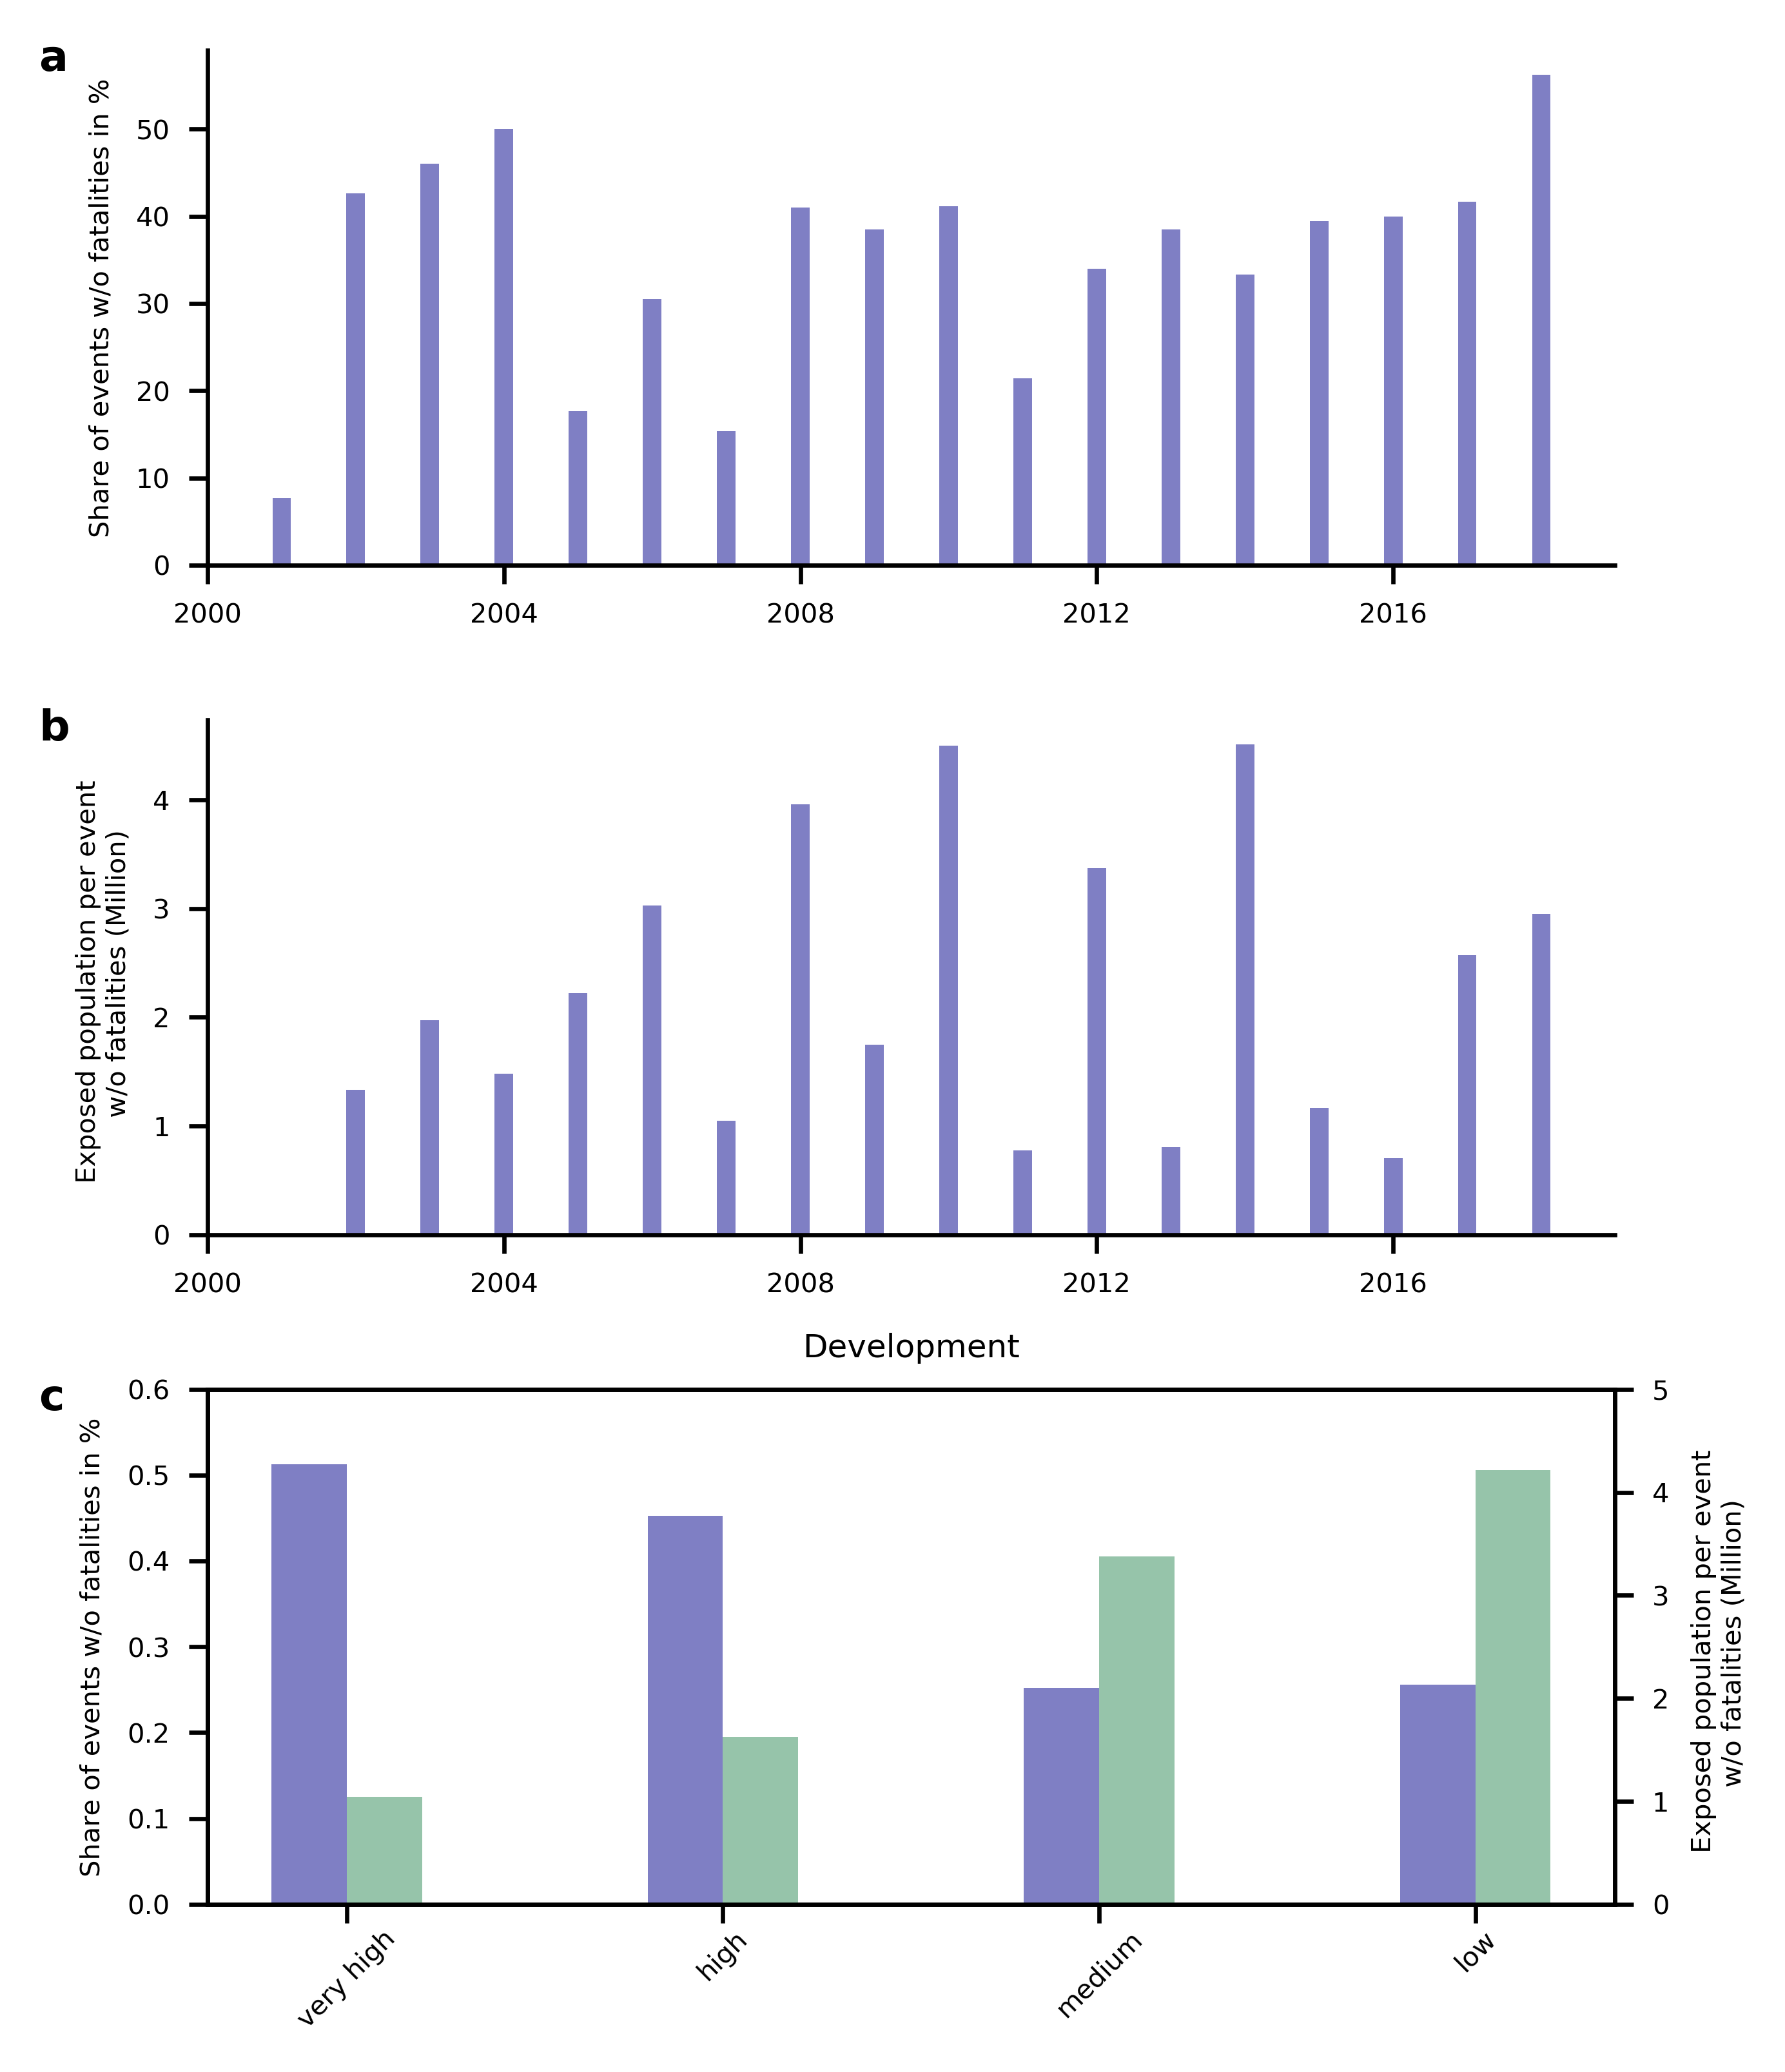

In [180]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.95, bottom= 0.08, left= 0.08, right=0.92, wspace=0.3, hspace=0.3)

income_groups=['High income','Upper middle income', 'Lower middle income', 'Low income']
exp_group_modeled=[1,2,3]
inds=[dev_groups]

fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(3, 1)

labs=['highly', 'moderately', 'slightly']

titles=['Vulnerability per flood experience (Assets)', 'Vulnerability per development level (Assets)',
        'Vulnerability per flood experience (Fatalities)', 'Vulnerability per development level (Fatalities)',
        'Vulnerability per flood experience (Displacement)', 'Vulnerability per development level (Displacement)']

titles=['Asset', 'Fatalities', 'Displacement']
col_names=['Flood risk level', 'Infrastructure', 'Development']
row_variables=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
col_variables=['modeled_fld_exp', 'log_CISI_global_affected_mean', 'HDI_mean']

v=0

variables=['n_events_0','pop_affected_0']
variables2=['share_0_events','pop_per_0']

units=['Share of events w/o fatalities in %','Exposed population per event \n w/o fatalities (Million)']

ls=['a','b','c','d']

        
f3_ax1 = fig1.add_subplot(gs[0:1, 0:1])
f3_ax1.text(-0.12, 0.96, 'a', transform=f3_ax1.transAxes, 
                size=8, weight='bold')
f3_ax1.bar(dfo_annual.index, dfo_annual['share_0_events'], alpha=0.5, color='darkblue', width=0.25)
f3_ax1.set_xticks([2000,2004,2008,2012,2016])
f3_ax1.tick_params('both',labelsize=5)
for axis in ['top','right']:
    f3_ax1.spines[axis].set_linewidth(0)
f3_ax1.set_ylabel(units[0], fontsize=5)
    
f3_ax2 = fig1.add_subplot(gs[1:2, 0:1])
f3_ax2.text(-0.12, 0.96, 'b', transform=f3_ax2.transAxes, 
                size=8, weight='bold')
f3_ax2.bar(dfo_annual.index, dfo_annual['pop_per_0'], alpha=0.5, color='darkblue', width=0.25)
f3_ax2.set_xticks([2000,2004,2008,2012,2016])
f3_ax2.tick_params('both',labelsize=5)
for axis in ['top','right']:
    f3_ax2.spines[axis].set_linewidth(0)
f3_ax2.set_ylabel(units[1], fontsize=5)

    
f3_ax3 = fig1.add_subplot(gs[2:3, 0:1])
f3_ax3.text(-0.12, 0.96, 'c', transform=f3_ax3.transAxes, 
                size=8, weight='bold')
f3_ax6 = f3_ax3.twinx()
f3_ax3.bar(np.arange(1,5)-0.1,dev_share_0, alpha=0.5,color='darkblue',width=0.2)
f3_ax6.bar(np.arange(1,5)+0.1,dev_pop_per_0, alpha=0.5, color='seagreen',width=0.2,
           tick_label=['very high','high','medium', 'low'])
f3_ax6.set_xticks([1,2,3,4])
#f3_ax3.set_yticks([])
f3_ax3.tick_params('x',labelsize=5, rotation=45, pad=0.5)
f3_ax3.tick_params('y',labelsize=5)
f3_ax6.tick_params('y',labelsize=5)
f3_ax6.set_ylim([0,5])

f3_ax3.set_ylim([0,0.6])
f3_ax6.set_ylabel(units[1], fontsize=5)
f3_ax3.set_title('Development',fontsize=6)
f3_ax3.set_ylabel(units[0], fontsize=5)


            
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_fig_7.png')

In [168]:
dfo_original=pd.read_excel('/home/insauer/projects/submission_vul_sat/input_data/FloodArchive.xlsx')
dfo_original

ID GlideNumber      Country OtherCountry       long       lat  \
0        1           0      Algeria            0    5.23026  35.81420   
1        2           0       Brazil            0  -45.34890 -18.71110   
2        3           0  Phillipines            0  122.97400  10.02070   
3        4           0    Indonesia            0  124.60600   1.01489   
4        5           0   Mozambique            0   32.34910 -25.86930   
...    ...         ...          ...          ...        ...       ...   
5125  5127         NaN     Thailand          NaN  101.32300  17.32040   
5126  5128         NaN          USA          NaN  -86.62910  32.49010   
5127  5129         NaN       Mexico          NaN -100.83200  19.95080   
5128  5130         NaN        India          NaN   87.96100  23.79840   
5129  5131         NaN        Italy          NaN    9.37570  44.63930   

           Area      Began      Ended Validation  Dead  Displaced  \
0      92615.67 1985-01-01 1985-01-05       News    26       3000   
1     678498.82 1985-01-15 1985-02-02       News   229      80000   
2      12846.03 1985-01-20 1985-01-21       News    43        444   
3      16542.12 1985-02-04 1985-02-18       News    21        300   
4      20082.21 1985-02-09 1985-02-11       News    19          0   
...         ...        ...        ...        ...   ...        ...   
5125  218554.79 2021-09-23 2021-09-28  FloodList     0      40000   
5126   35416.48 2021-10-06 2021-10-09  FloodList     4          0   
5127   69141.86 2021-10-01 2021-10-09  FloodList     4       2440   
5128   42828.60 2021-10-01 2021-10-09  FloodList    11     500000   
5129   10408.23 2021-10-04 2021-10-06  FloodList     0          0   

                  MainCause  Severity  
0                Heavy rain       1.0  
1                Heavy rain       2.0  
2           Torrential rain       1.0  
3           Torrential rain       1.0  
4                Heavy rain       2.0  
...                     ...       ...  
5125  Tropical Storm Dianmu       1.5  
5126        Torrential Rain       1.5  
5127             Heavy Rain       1.5  
5128         Monsoonal Rain       1.5  
5129        Torrential Rain       1.5  

[5130 rows x 14 columns]

In [169]:
def year(x):
    return int(x.split('-')[0])
    
dfo_original['year']=dfo_original['Began'].astype(str).apply(year)
dfo_original

ID GlideNumber      Country OtherCountry       long       lat  \
0        1           0      Algeria            0    5.23026  35.81420   
1        2           0       Brazil            0  -45.34890 -18.71110   
2        3           0  Phillipines            0  122.97400  10.02070   
3        4           0    Indonesia            0  124.60600   1.01489   
4        5           0   Mozambique            0   32.34910 -25.86930   
...    ...         ...          ...          ...        ...       ...   
5125  5127         NaN     Thailand          NaN  101.32300  17.32040   
5126  5128         NaN          USA          NaN  -86.62910  32.49010   
5127  5129         NaN       Mexico          NaN -100.83200  19.95080   
5128  5130         NaN        India          NaN   87.96100  23.79840   
5129  5131         NaN        Italy          NaN    9.37570  44.63930   

           Area      Began      Ended Validation  Dead  Displaced  \
0      92615.67 1985-01-01 1985-01-05       News    26       3000   
1     678498.82 1985-01-15 1985-02-02       News   229      80000   
2      12846.03 1985-01-20 1985-01-21       News    43        444   
3      16542.12 1985-02-04 1985-02-18       News    21        300   
4      20082.21 1985-02-09 1985-02-11       News    19          0   
...         ...        ...        ...        ...   ...        ...   
5125  218554.79 2021-09-23 2021-09-28  FloodList     0      40000   
5126   35416.48 2021-10-06 2021-10-09  FloodList     4          0   
5127   69141.86 2021-10-01 2021-10-09  FloodList     4       2440   
5128   42828.60 2021-10-01 2021-10-09  FloodList    11     500000   
5129   10408.23 2021-10-04 2021-10-06  FloodList     0          0   

                  MainCause  Severity  year  
0                Heavy rain       1.0  1985  
1                Heavy rain       2.0  1985  
2           Torrential rain       1.0  1985  
3           Torrential rain       1.0  1985  
4                Heavy rain       2.0  1985  
...                     ...       ...   ...  
5125  Tropical Storm Dianmu       1.5  2021  
5126        Torrential Rain       1.5  2021  
5127             Heavy Rain       1.5  2021  
5128         Monsoonal Rain       1.5  2021  
5129        Torrential Rain       1.5  2021  

[5130 rows x 15 columns]

In [170]:
nc_original=pd.read_csv('/home/insauer/projects/submission_vul_sat/input_data/natcat_CPI_adjusted_ppp2011.csv')
nc_original

Unnamed: 0  year                begin                  end  \
0              7  1980           1980-01-01           1980-01-01   
1             21  1980           1980-01-02           1980-01-02   
2             31  1980           1980-01-09           1980-01-09   
3             33  1980           1980-01-14           1980-01-21   
4             38  1980           1980-01-20           1980-01-20   
...          ...   ...                  ...                  ...   
8818       30550  2016  2016-12-26 00:00:00  2016-12-27 00:00:00   
8819       30553  2016  2016-12-27 00:00:00  2016-12-28 10:22:25   
8820       30555  2016  2016-12-28 00:00:00  2016-12-30 00:00:00   
8821       30557  2016  2016-12-29 00:00:00  2016-12-30 00:00:00   
8822       30560  2016  2016-12-30 00:00:00  2016-12-30 00:00:00   

                          event type           subtype  ISO  \
0                         Flood    C  gf:General flood  PHL   
1                         Flood    C  gf:General flood  BRA   
2                         Flood    C  gf:General flood  IDN   
3                         Flood    C  gf:General flood  NZL   
4                         Flood    C  gf:General flood  COL   
...                         ...  ...               ...  ...   
8818                Flash flood    C    ff:Flash flood  COD   
8819  Flash flood, severe storm    C    ff:Flash flood  AUS   
8820                Flash flood    C    ff:Flash flood  TUR   
8821     Flash flood, landslide    C    ff:Flash flood  ECU   
8822     Flash flood, landslide    C    ff:Flash flood  BOL   

                                    country Continent  ...   Latitude  \
0                               Philippines      ASIA  ...   6.500000   
1                                    Brazil      AMER  ... -23.950000   
2                                 Indonesia      ASIA  ...  -5.683000   
3                               New Zealand     OCEAN  ... -45.000000   
4                                  Colombia      AMER  ...   9.306862   
...                                     ...       ...  ...        ...   
8818  Congo, the Democratic Republic of the     AFRIC  ...  -5.848732   
8819                              Australia     OCEAN  ... -34.928690   
8820                          Turkey (Asia)      ASIA  ...  36.804536   
8821                                Ecuador      AMER  ...  -1.482849   
8822                                Bolivia      AMER  ... -16.983333   

      Reg_name     ID  Reg_ID   CPI_conv   GDP_conv  unexact_conv  \
0          SEA  163.0     7.0   0.250355   0.565823           0.0   
1          LAN   29.0     3.0   0.169394   1.199659           0.0   
2          SEA   92.0     7.0   0.271674   1.897028           0.0   
3          AUS  157.0    10.0   0.180094   0.362561           0.0   
4          LAN   44.0     3.0   0.117861   0.418010           0.0   
...        ...    ...     ...        ...        ...           ...   
8818       SSA   41.0     5.0   0.454826   0.316797           0.0   
8819       AUS   13.0    10.0  12.536571  12.107510           0.0   
8820       ARA  210.0    15.0  12.148503  10.749940           0.0   
8821       LAN   58.0     3.0   1.874437   1.500663           0.0   
8822       LAN   28.0     3.0   1.166735   1.018253           0.0   

      CPI_conv_ppp GDP_conv_ppp  unexact_conv_ppp  
0         0.170382     0.385078               0.0  
1         0.079145     0.560506               0.0  
2         0.205830     1.437256               0.0  
3         0.140590     0.283032               0.0  
4         0.118619     0.420699               0.0  
...            ...          ...               ...  
8818      0.449840     0.313323               0.0  
8819     12.091528    11.677699               0.0  
8820     12.770431    11.300270               0.0  
8821      1.754582     1.404708               0.0  
8822      1.059028     0.924253               0.0  

[8823 rows x 27 columns]

In [171]:
dfo_original['events']=1
dfo_original_0=dfo_original.loc[dfo_original['Dead']==0]
dfo_original_annual=dfo_original.groupby('year').sum()
dfo_original_annual_0=dfo_original_0.groupby('year').sum()
dfo_original_annual['share_0_events']=(100*dfo_original_annual_0['events'])/(dfo_original_annual['events'])

In [172]:
nc_original['events']=1
nc_original_0=nc_original.loc[nc_original['Fatalities']==0]
nc_original_annual=nc_original.groupby('year').sum()
nc_original_annual_0=nc_original_0.groupby('year').sum()
nc_original_annual['share_0_events']=(100*nc_original_annual_0['events'])/(nc_original_annual['events'])

In [173]:
cm = 1/2.54
x_width= 18.0*cm
y_width= 6.0*cm
y_width

2.3622047244094486

/home/insauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


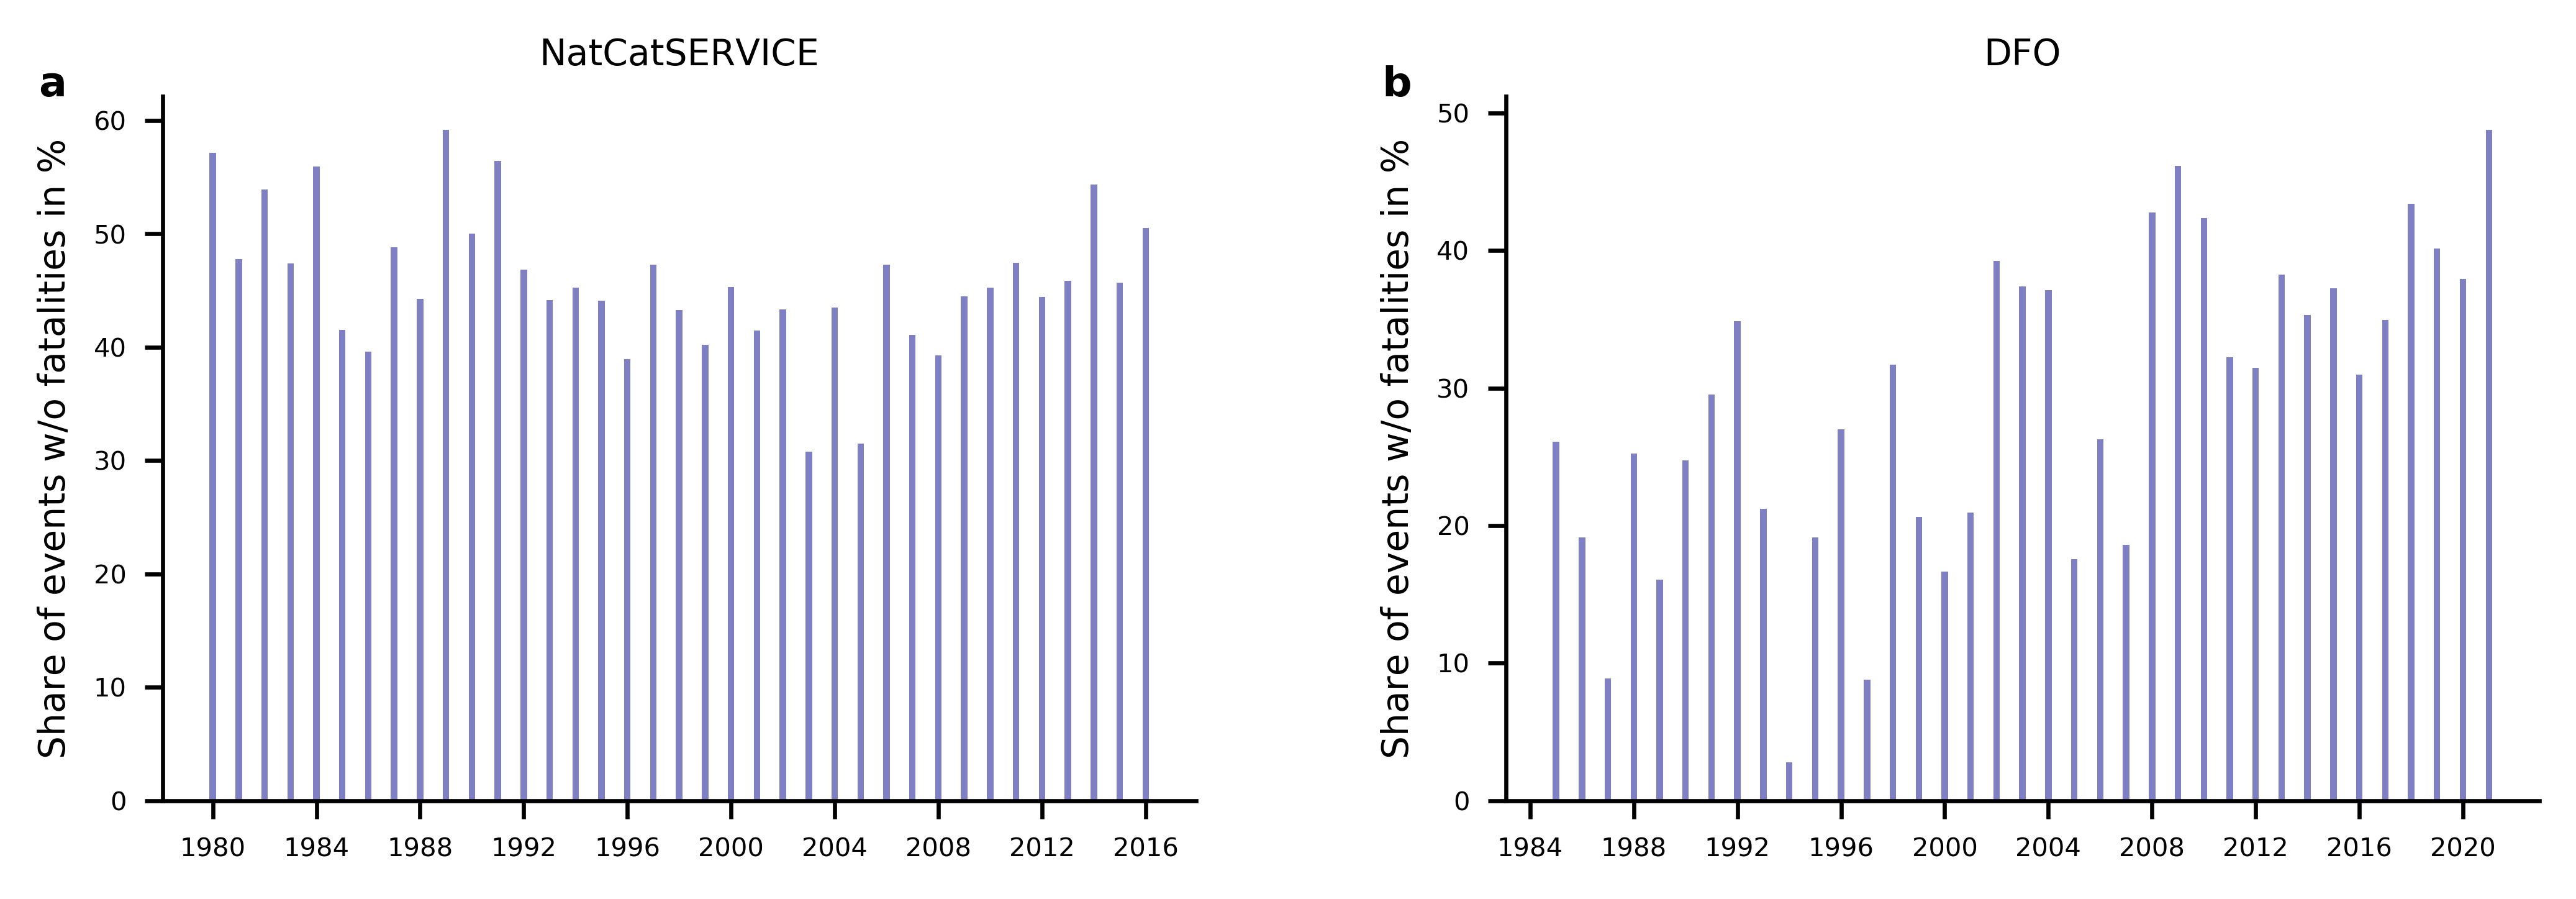

In [174]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)
plt.subplots_adjust(top=0.90, bottom= 0.1, left= 0.05, right=0.95, wspace=0.3, hspace=0.3)

income_groups=['High income','Upper middle income', 'Lower middle income', 'Low income']
exp_group_modeled=[1,2,3]
inds=[dev_groups]

fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(1, 2)
f3_ax1 = fig1.add_subplot(gs[0: 1, 0:1])
labs=['highly', 'moderately', 'slightly']

titles=['Vulnerability per flood experience (Assets)', 'Vulnerability per development level (Assets)',
        'Vulnerability per flood experience (Fatalities)', 'Vulnerability per development level (Fatalities)',
        'Vulnerability per flood experience (Displacement)', 'Vulnerability per development level (Displacement)']

titles=['Asset', 'Fatalities', 'Displacement']
col_names=['Flood risk level', 'Infrastructure', 'Development']
row_variables=['log_vul_asset', 'log_vul_fat', 'log_vul_dis']
col_variables=['modeled_fld_exp', 'log_CISI_global_affected_mean', 'HDI_mean']

v=0

variables=['n_events_0','pop_affected_0']
variables2=['share_0_events','pop_per_0']

units=['Share of events w/o fatalities in %','Exposed population per event \n w/o fatalities (Million)']

titles=['NatCatSERVICE', 'DFO']

ls=['a','b','c','d']
        
f3_ax1 = fig1.add_subplot(gs[0:1, 1:2])
f3_ax1.text(-0.12, 1, 'b', transform=f3_ax1.transAxes, 
                size=8, weight='bold')
f3_ax1.bar(dfo_original_annual.index, dfo_original_annual['share_0_events'], alpha=0.5, color='darkblue', width=0.25)
f3_ax1.set_xticks([1984,1988,1992,1996,2000,2004,2008,2012,2016, 2020])
f3_ax1.tick_params('both',labelsize=5)
for axis in ['top','right']:
    f3_ax1.spines[axis].set_linewidth(0)
f3_ax1.set_ylabel(units[0], fontsize=7)
f3_ax1.set_title(titles[1], fontsize=7)
    
f3_ax2 = fig1.add_subplot(gs[0:1, 0:1])
f3_ax2.text(-0.12,1 , 'a', transform=f3_ax2.transAxes, 
                size=8, weight='bold')

f3_ax2.bar(nc_original_annual.index, nc_original_annual['share_0_events'], alpha=0.5, color='darkblue', width=0.25)
f3_ax2.set_xticks([1980,1984,1988,1992,1996,2000,2004,2008,2012,2016])
f3_ax2.tick_params('both',labelsize=5)
f3_ax2.set_title(titles[0], fontsize=7)

for axis in ['top','right']:
    f3_ax2.spines[axis].set_linewidth(0)
f3_ax2.set_ylabel(units[0], fontsize=5)    
f3_ax2.set_ylabel(units[0], fontsize=7)          
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/dfo_natcat_zeros.png')

In [175]:
cm = 1/2.54
x_width= 16.0*cm
y_width= 20.0*cm
y_width

7.874015748031495

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

4.9536339858920505e-08
5.967153208448773e-08
2.5236315380857892e-08
1.8937553266602952e-08
1.3721027363019865e-28


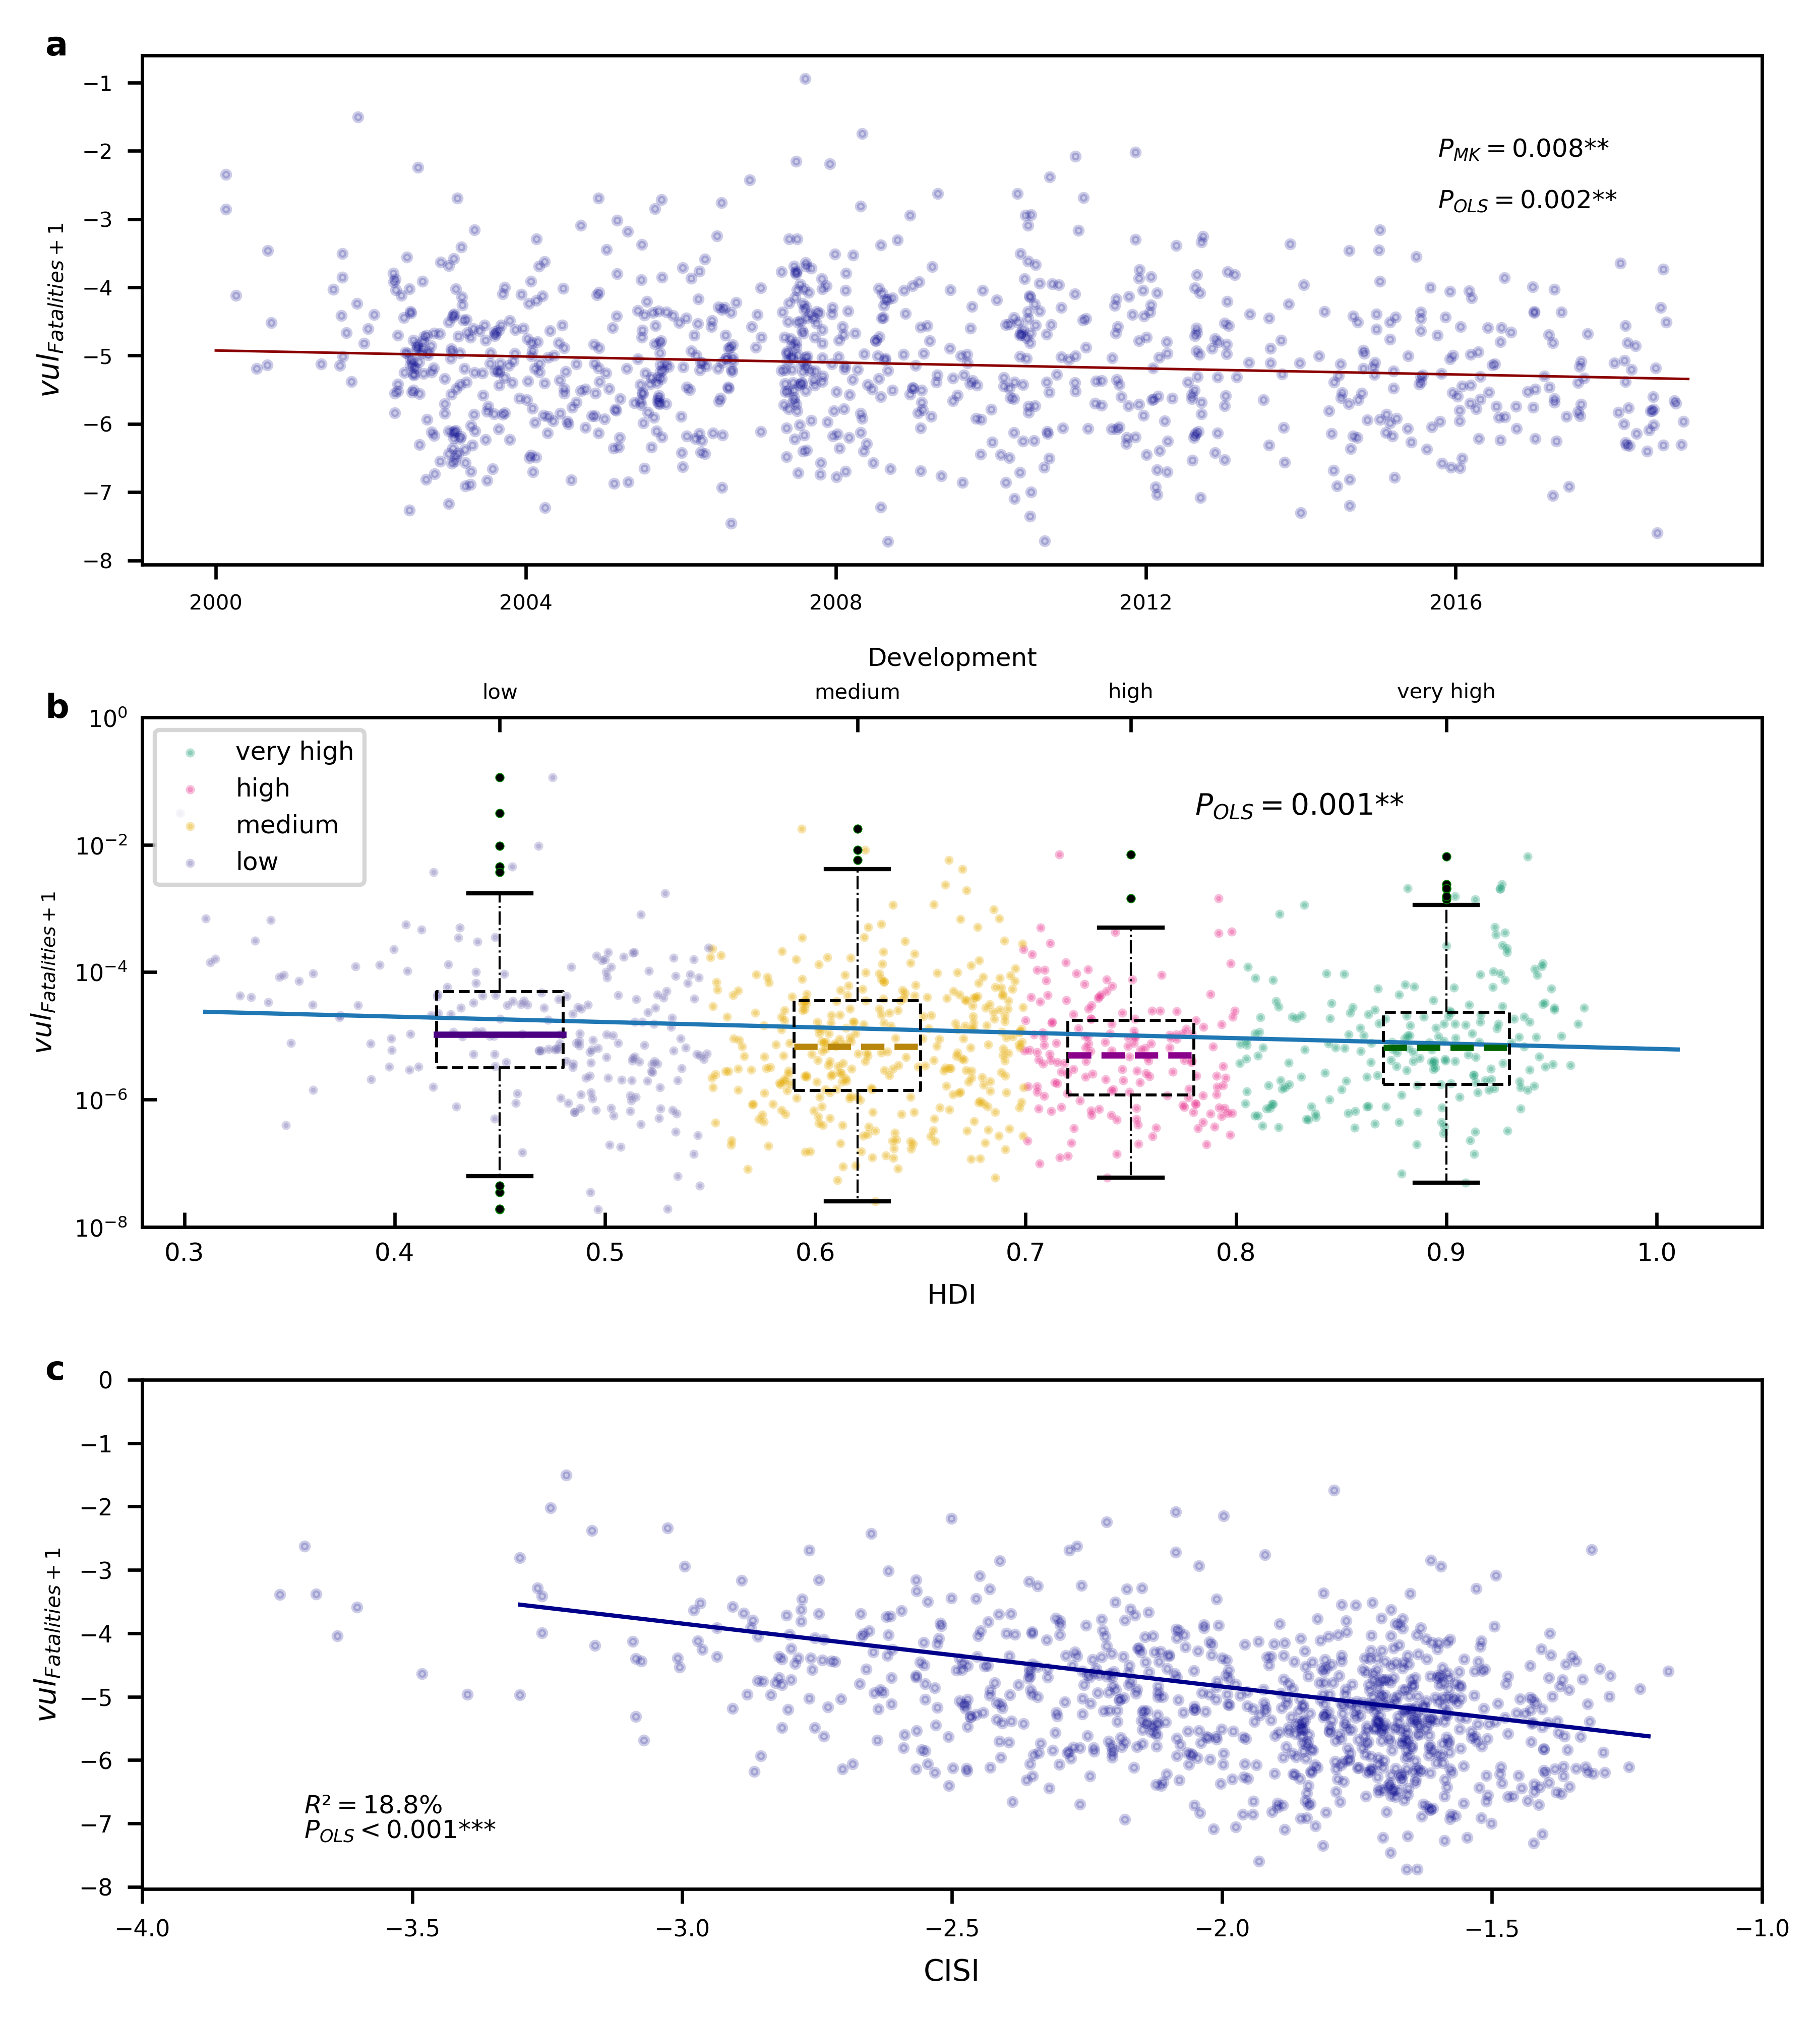

In [176]:
fig1 = plt.figure(figsize=(x_width,y_width), dpi=600)

plt.subplots_adjust(top=0.9, bottom= 0.13, left= 0.1, right=0.95, wspace=0., hspace=0.3)
fig1.patch.set_facecolor('white')
gs = fig1.add_gridspec(3, 1)

f3_ax1 = fig1.add_subplot(gs[0: 1, 0:1])
f3_ax1.text(-0.06,1 , 'a', transform=f3_ax1.transAxes, 
                size=8, weight='bold')
f3_ax1.scatter(dfo['day_plot'], dfo['log_vul_fat_alt'],alpha=0.2, s=3.4,
                          c='darkblue')

df1=pd.DataFrame()
df1['day_plot']=dfo['day_plot']
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat_alt'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(2000,2020) + y_ax
sig= mk.original_test(dfo['vul_fat_alt'], alpha=0.05)
p=sig.p
r=results.pvalues[1]

if r<0.05:
    f3_ax1.plot(np.arange(2000,2020), y, c ='darkred', linewidth=0.6)
else:
    f3_ax1.plot(np.arange(2000,2020), y, c ='darkred', linewidth=0.6, linestyle='--')

f3_ax1.annotate('$P_{MK}=$'+str(np.round(p,3))+'**', (0.8,0.8), xycoords='axes fraction',fontsize=6)
f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.8,0.7), xycoords='axes fraction',fontsize=6)

f3_ax1.set_xticks([2000,2004,2008,2012,2016])
f3_ax1.set_ylabel('$vul_{Fatalities+1}$', fontsize=7)
f3_ax1.tick_params(axis='both', which='major', labelsize=5)


f3_ax1 = fig1.add_subplot(gs[1: 2, 0:1])

dev_groups=['very high','high','medium', 'low']


col_names='development'

var_names=['HDI_mean']
reg_names=['HDI_mean']

flierprops = dict(marker='o', markerfacecolor='black', markersize=2,
                  markeredgecolor='green', markeredgewidth=0.2)
whiskerprops = dict(linestyle='-.', linewidth=0.5, color='k')

titles=[ 'Vulnerability per development level (Assets)',
        'Vulnerability per development level (Fatalities)',
        'Vulnerability per development level (Displacement)']
labels=['very high','high','medium', 'low']

windows=[80,60,40]

v=0
positions=[[0.9,0.75,0.62,0.45]]

variables=['log_vul_fat']

width=[ 0.06]
pos_add=[0.05]

units=['$vul_{Assets}$',
       '$vul_{Fatalities+1}$']

xticks=[[0.45,0.62,0.75,0.9]]
xlims=[[0.28,1.05]]
xlabel1=[ 'HDI']
xlabel2=[ 'Development']

ls=['a', 'b', 'c']
#rs=['d', 'e', 'f']

f3_ax2 = f3_ax1.twiny()

f3_ax1.text(-0.06,1 , 'b', transform=f3_ax1.transAxes, 
                size=8, weight='bold')


for l,g in enumerate(dev_groups):

    f3_ax1.scatter(dfo.loc[dfo['development']==g,'HDI_mean'],
                dfo.loc[dfo['development']==g,'log_vul_fat_alt'],label=g, alpha=0.3,
                   s=1.4,c=cols[l])

data_list=[]
data_list1=[]
for g in dev_groups:

    data_list.append(dfo.loc[dfo['development']==g,'log_vul_fat_alt'].dropna())
    data_list1.append(dfo.loc[dfo['development']==g,'vul_fat_alt'].replace([-np.inf,np.inf], [np.nan,np.nan]).dropna())
    print(dfo.loc[dfo['development']==g,'vul_fat_alt'].replace([-np.inf,np.inf], [np.nan,np.nan]).dropna().min())

df1=pd.DataFrame()
df1['day']=dfo['HDI_mean'].replace([np.inf,-np.inf], [np.nan,np.nan])
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat'], exog=df1[['const','day']], 
    missing='drop')

results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
            
            
r=results.pvalues['day']



h = np.arange(0.31,1.05,0.05)
y = slope*h + y_ax


if r < 0.05:
    f3_ax1.plot(h,y, linewidth=1.)
else:
    f3_ax1.plot(h,y, linewidth=1., linestyle='--')



if r<0.001:
    f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.65,0.81), xycoords='axes fraction',fontsize=7)
elif r<0.01:
    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3))+'**', (0.65,0.81), xycoords='axes fraction',fontsize=7)
else:

    f3_ax1.annotate('$P_{OLS}=$'+str(np.round(r,3)), (0.65,0.81), xycoords='axes fraction',fontsize=7)
                

        
labels1=[]
for g in np.arange(len(dev_groups)):
    sig=True

    for h in np.arange(len(dev_groups)):
        if stats.kruskal(data_list[g],data_list[h]).pvalue > 0.1:
            if g !=h:
                sig=False
    labels1.append(sig)

labels2=[]
for g in np.arange(len(dev_groups)):
    sig=True

    for h in np.arange(len(dev_groups)):
        if stats.kruskal(data_list1[g],data_list1[h]).pvalue > 0.1:
            if g !=h:
                sig=False
    labels2.append(sig)

for p, pos in enumerate(positions[0]):
    if labels1[p]:

        boxprops = dict(linestyle='--', linewidth=0.7, color='k')
        medianprops = dict(linestyle='-', linewidth=1.5, color=median_colors[p])
    else:
        boxprops = dict(linestyle='--', linewidth=0.7, color='k')
        medianprops = dict(linestyle='--', linewidth=1.5, color=median_colors[p])

    f3_ax2.set_xticklabels(['','','','','',''])


    f3_ax2.boxplot(data_list[p], positions=[pos], labels=[''] , widths=width[0], boxprops=boxprops, flierprops=flierprops, medianprops=medianprops,
           whiskerprops=whiskerprops)
        
        #f3_ax1.legend(fontsize=6, markerscale=2)

f3_ax1.set_xlim(xlims[0])
f3_ax2.set_xlim(xlims[0])
f3_ax1.set_ylim([-8,0])
f3_ax2.set_ylim([-8,0])
f3_ax1.legend(fontsize=6, loc='upper left')
f3_ax1.tick_params(axis='both', which='both', labelsize=6, direction='in')
f3_ax2.tick_params(axis='both', which='both', labelsize=6, direction='in')
#f3_ax3.tick_params(axis='both', which='major', labelsize=6, direction='in')

f3_ax2.set_xticklabels(labels,fontsize=5)
f3_ax2.set_xlabel(xlabel2[0],fontsize=6)
#f3_ax1.set_ylabel(units[i], fontsize=6)


f3_ax1.set_yticks([-8,-6,-4,-2, 0])
f3_ax1.set_yticklabels(['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'], fontsize=5.5)


f3_ax1.set_ylabel('$vul_{Fatalities+1}$', fontsize=6.5)
f3_ax1.set_xlabel(xlabel1[0], fontsize=6.5)
f3_ax2.set_xticks(positions[0])


f3_ax1 = fig1.add_subplot(gs[2: 3, 0:1])
f3_ax1.text(-0.06,1 , 'c', transform=f3_ax1.transAxes, 
                size=8, weight='bold')

f3_ax1.scatter(dfo['log_CISI_global_affected_mean'], dfo['log_vul_fat_alt'],alpha=0.2, s=3.4,
                          c='darkblue')

df1=pd.DataFrame()
df1['day_plot']=dfo['log_CISI_global_affected_mean']
df1['const']=1

reg1 = sm.OLS(endog=dfo['log_vul_fat'], exog=df1[['const','day_plot']], 
                missing='drop')
results = reg1.fit()
y_ax=results.params[0]
slope= results.params[1]
y = slope*np.arange(-3.3,-1.2,0.01) + y_ax

r=results.pvalues[1]
R2=results.rsquared
print(r)
f3_ax1.plot(np.arange(-3.3,-1.2,0.01), y, c ='darkblue', linewidth=1)

f3_ax1.set_yticks([-8,-6,-4,-2,0],['$10^{-8}$','$10^{-6}$','$10^{-4}$','$10^{-2}$','$10^{0}$'])

f3_ax1.set_xticks([-4,-3,-2,-1],['$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$'])
f3_ax1.annotate('$P_{OLS}<$'+str(0.001)+'***', (0.1,0.1), xycoords='axes fraction',fontsize=6)
f3_ax1.annotate('$R² =}$'+str(np.round(R2*100,1))+'%', (0.1,0.15), xycoords='axes fraction',fontsize=6)
#plt.xticks([2000,2004,2008,2012,2016])
f3_ax1.set_ylabel('$vul_{Fatalities+1}$', fontsize=7)
f3_ax1.set_xlabel('CISI', fontsize=7)
f3_ax1.tick_params(axis='both', which='major', labelsize=5.5)
plt.savefig('/home/insauer/projects/submission_vul_sat/supplementary_figures/SI_dfo_fatalities+1.png')